In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 3/Machine Learning/Assignment 1/Credit score/train.csv')

/var/folders/wy/fb319nn12db5rdprbkkf0yqr0000gn/T/ipykernel_10629/331004465.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 3/Machine Learning/Assignment 1/Credit score/train.csv')


In [3]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.shape

(100000, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

* To collect data on unemployment rates, which is a crucial factor in classifying a customer's credit score, I am making an API call to the FRED (Federal Reserve Economic Data) website using my API key and the specified endpoints. Since the dataset focuses on the year 2022, I will convert the 'Month' column of the DataFrame (df) to a datetime format, which will facilitate merging the unemployment rate data retrieved from the API with the existing dataset.

In [6]:
default_year = 2022
df['Month'] = pd.to_datetime(df['Month'] + f' {default_year}', format='%B %Y')

In [7]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,2022-01-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2022-02-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,2022-03-01,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,2022-04-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,2022-05-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
import pandas as pd
import requests

# Replace with your actual API key
api_key = 'd6a3cb0adba25aba2b4ab1ae9fd4384d'

# Define the API endpoints for different economic indicators
urls = {
    'Unemployment_Rate': f'https://api.stlouisfed.org/fred/series/observations?series_id=UNRATE&api_key={api_key}&file_type=json'
}

# Function to fetch and process data
def fetch_fred_data(url):
    response = requests.get(url)
    data = response.json()
    observations = data['observations']
    df = pd.DataFrame(observations)
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    return df[['date', 'value']]

# Fetch data for each indicator
unemployment_rate_df = fetch_fred_data(urls['Unemployment_Rate'])

In [9]:
# Display the first few rows of each DataFrame
print("Unemployment Rate Data:")
print(unemployment_rate_df.head())

Unemployment Rate Data:
        date  value
0 1948-01-01    3.4
1 1948-02-01    3.8
2 1948-03-01    4.0
3 1948-04-01    3.9
4 1948-05-01    3.5


In [10]:
df['Month'].dtype

dtype('<M8[ns]')

In [11]:
unemployment_rate_df.rename(columns={'value': 'Unemployment_Rate'}, inplace=True)

In [12]:
# Merge FRED data with your dataset
df = df.merge(unemployment_rate_df, left_on='Month', right_on='date', how='left')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,date,Unemployment_Rate
0,0x1602,CUS_0xd40,2022-01-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,2022-01-01,4.0
1,0x1603,CUS_0xd40,2022-02-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2022-02-01,3.8
2,0x1604,CUS_0xd40,2022-03-01,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,2022-03-01,3.6
3,0x1605,CUS_0xd40,2022-04-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,2022-04-01,3.7
4,0x1606,CUS_0xd40,2022-05-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,2022-05-01,3.6


In [13]:
print(df.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'date', 'Unemployment_Rate'],
      dtype='object')


In [14]:
# Drop redundant columns and keep only the relevant ones
df = df.drop(columns=['date'])

In [15]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Unemployment_Rate
0,0x1602,CUS_0xd40,2022-01-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,4.0
1,0x1603,CUS_0xd40,2022-02-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,3.8
2,0x1604,CUS_0xd40,2022-03-01,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3.6
3,0x1605,CUS_0xd40,2022-04-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,3.7
4,0x1606,CUS_0xd40,2022-05-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,3.6


In [16]:
# Reorder columns to move 'Credit_Score' to the end
columns = [col for col in df.columns if col != 'Credit_Score'] + ['Credit_Score']

# Reindex the DataFrame with the new column order
df = df[columns]

In [17]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Unemployment_Rate,Credit_Score
0,0x1602,CUS_0xd40,2022-01-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,4.0,Good
1,0x1603,CUS_0xd40,2022-02-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,3.8,Good
2,0x1604,CUS_0xd40,2022-03-01,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,3.6,Good
3,0x1605,CUS_0xd40,2022-04-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,3.7,Good
4,0x1606,CUS_0xd40,2022-05-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,3.6,Good


## Data Preprocessing

### 1) Removing unwanted columns

* In order to drop unwanted columns, lets understand the columns present in our dataset and if we need those columns.

In [18]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Unemployment_Rate,Credit_Score
0,0x1602,CUS_0xd40,2022-01-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,4.0,Good
1,0x1603,CUS_0xd40,2022-02-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,3.8,Good
2,0x1604,CUS_0xd40,2022-03-01,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,3.6,Good
3,0x1605,CUS_0xd40,2022-04-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,3.7,Good
4,0x1606,CUS_0xd40,2022-05-01,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,3.6,Good


In [19]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Unemployment_Rate', 'Credit_Score'],
      dtype='object')

In [20]:
# Count unique values in each column
unique_values = df.nunique()
print(unique_values)

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Unemployment_Rate                5
Credit_Score        

* The columns which could be dropped and the reason for dropping is mentioned below:

1) **ID:** This is a unique identifier for each row and does not provide any useful information for classification. It's just metadata.

2) **Customer_ID:** Similar to ID, this is just a unique identifier for customers. It does not contribute to the prediction of credit scores.

3) **Name:** The name of the customer is irrelevant for classification. It does not impact credit score predictions and could be dropped for privacy reasons.

4) **SSN:** The Social Security Number is a personal identifier and not related to credit score classification. It also could pose privacy concerns.
   
5) **Monthly_Inhand_Salary:** Since you already have Annual_Income, Monthly_Inhand_Salary may be redundant, or you can derive it from Annual_Income. It's important to keep one or the other.

* For handling few missing values in rows such as age, we will keep **Customer_ID** for time being just in case it turn out useful, once we have dealt with missing values, we can drop this column as well.

In [21]:
# List of columns to drop
columns_to_drop = ['ID', 'Name', 'SSN', 'Monthly_Inhand_Salary']

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Unemployment_Rate,Credit_Score
0,CUS_0xd40,2022-01-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,4.0,Good
1,CUS_0xd40,2022-02-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,3.8,Good
2,CUS_0xd40,2022-03-01,-500,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,3.6,Good
3,CUS_0xd40,2022-04-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,3.7,Good
4,CUS_0xd40,2022-05-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,3.6,Good


### 2) Handling Missing values

In [22]:
# Count missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Unemployment_Rate               0
Credit_Score                    0
dtype: int64


* We can observe that there are 6 columns with missing values, the columns along with the count is shown below:

1) **Type_of_Loan** - 11408
2) **Num_of_Delayed_Payments** - 7002
3) **Num_Credit_Inquiries** - 1965
4) **Credit_History_Age** - 9030
5) **Amount_invested_monthly** - 4479
6) **Monthly_Balance** - 1200

* Let us handle each of these categoies appropriately

#### 1) Type_of_Loan

* For type of loan, there are 6260 unique values as it has one or combination of few types of loans, let us try checking how many types of loans are there and is there a better approach for handling this scenario

In [23]:
# Type of Loan

d = {}
for loans in df['Type_of_Loan']:
    if isinstance(loans, str):  # Check if the entry is a string
        loan_list = loans.split(', ')  # Adjust the delimiter if necessary
        for loan in loan_list:
            if loan not in d:
                d[loan] = 1
            else:
                d[loan] += 1
len(d.keys())

18

In [24]:
d.keys()

dict_keys(['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'and Home Equity Loan', 'and Not Specified', 'Not Specified', 'and Mortgage Loan', 'and Student Loan', 'Debt Consolidation Loan', 'and Auto Loan', 'and Payday Loan', 'Payday Loan', 'Student Loan', 'and Personal Loan', 'Home Equity Loan', 'Mortgage Loan', 'and Debt Consolidation Loan', 'and Credit-Builder Loan'])

* We can observe that the loan types are repeating twice with one type having a 'and' in the loan type. We can remap this to create broader loan types, helping us reducing the no of unique categories.

In [25]:
# Define broad categories
#loan_category_mapping = {
   # 'Personal Loan': ['Personal Loan', 'and Personal Loan'],
   # 'Auto Loan': ['Auto Loan', 'and Auto Loan'],
   # 'Mortgage Loan': ['Mortgage Loan', 'and Mortgage Loan'],
   # 'Student Loan': ['Student Loan', 'and Student Loan'],
   # 'Debt Consolidation Loan': ['Debt Consolidation Loan', 'and Debt Consolidation Loan'],
   # 'Credit-Builder Loan': ['Credit-Builder Loan', 'and Credit-Builder Loan'],
   # 'Payday Loan': ['Payday Loan', 'and Payday Loan'],
   # 'Home Equity Loan': ['Home Equity Loan', 'and Home Equity Loan'],
   # 'Not Specified': ['Not Specified', 'and Not Specified']
#}

* We filled the missing values in the Type_of_Loan column with the placeholder 'Random' to maintain dataset integrity and prevent issues during model building. This approach ensures that every row has a valid value, avoids the risk of biased imputations at this stage, and allows us to proceed without losing data. The use of 'Random' serves as a flexible, temporary placeholder, enabling us to later revisit this decision and adjust the imputation method if necessary, based on the model’s performance.

In [26]:
# Fill missing values in 'Type_of_Loan' with 'Random'

df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Random')

# Verify changes
print(df['Type_of_Loan'].isna().sum())  # Should print 0 if all missing values are filled
#print(df['Type_of_Loan'].value_counts())  # Check the distribution of values

0


#### 2) Num_of_Delayed_Payments

In [27]:
df['Num_of_Delayed_Payment'].describe()

count     92998
unique      749
top          19
freq       5327
Name: Num_of_Delayed_Payment, dtype: object

* Total number of missing values in Num_of_Delayed_Payments is:

In [28]:
df['Num_of_Delayed_Payment'].isnull().sum()

7002

* Total number of unique Customer ID having missing values in Num_of_Delayed_Payments:

In [29]:
# Step 1: Separate rows with missing and non-missing 'Num_of_Delayed_Payment'
missing_delayed_payment = df[df['Num_of_Delayed_Payment'].isna()]
non_missing_delayed_payment = df[~df['Num_of_Delayed_Payment'].isna()]

# Step 2: Get the Customer_IDs for both cases
missing_ids = missing_delayed_payment['Customer_ID'].unique()
non_missing_ids = non_missing_delayed_payment['Customer_ID'].unique()

In [30]:
missing_ids = missing_delayed_payment['Customer_ID'].unique()
len(missing_ids)

5465

* Total number of rows with missing values in Num_of_Delayed_Payments and rows with same Customer ID having non missing values:

In [31]:
# Step 3: Find common Customer_IDs
common_ids = set(missing_ids) & set(non_missing_ids)
num_common_ids = len(common_ids)

print(f"Number of common Customer_IDs with both missing and non-missing 'Num_of_Delayed_Payment': {num_common_ids}")

Number of common Customer_IDs with both missing and non-missing 'Num_of_Delayed_Payment': 5465


* As we can see that all the missing values have common Customer ID(representing the same customer in different months) with rows with non missing values, we can use those rows with same Customer ID and and take the mean to replace the missing values.

In [32]:
# Convert 'Num_of_Delayed_Payment' to numeric, coercing errors to NaN
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

# Step 1: Create a dictionary with mean values for each 'Customer_ID'
mean_dict = df[df['Num_of_Delayed_Payment'].notna()] \
              .groupby('Customer_ID')['Num_of_Delayed_Payment'] \
              .mean() \
              .to_dict()

# Step 2: Define a function to fill missing values based on the dictionary
def fill_missing_values(row, mean_dict):
    if pd.isna(row['Num_of_Delayed_Payment']):
        return mean_dict.get(row['Customer_ID'], row['Num_of_Delayed_Payment'])
    return row['Num_of_Delayed_Payment']

# Step 3: Apply the function to the DataFrame
df['Num_of_Delayed_Payment'] = df.apply(lambda row: fill_missing_values(row, mean_dict), axis=1)

In [33]:
df['Num_of_Delayed_Payment'].isnull().sum()

0

* As we can see, all the missing values in column **Num_of_Delayed_Payments** is now zero.

#### 3) Num_Credit_Inquiries

In [34]:
# Display summary statistics
print(df['Num_Credit_Inquiries'].describe())

count    98035.000000
mean        27.754251
std        193.177339
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64


* Total number of missing values in Num_Credit_Inquiries is:

In [35]:
df['Num_Credit_Inquiries'].isnull().sum()

1965

* Total number of unique Customer ID having missing values in Num_Credit_Inquiries:

In [36]:
# Filter rows with missing values in 'Num_Credit_Inquiries'
missing_credit_inquiries = df[df['Num_Credit_Inquiries'].isna()]

# Get unique Customer_IDs from these rows
unique_customers_with_missing_inquiries = missing_credit_inquiries['Customer_ID'].nunique()

unique_customers_with_missing_inquiries

1827

* Total number of rows with missing values in Num_Credit_Inquiries and rows with same Customer ID having non missing values:

In [37]:
# Filter rows with non-missing values in 'Num_Credit_Inquiries'
non_missing_credit_inquiries = df[df['Num_Credit_Inquiries'].notna()]

# Get unique Customer_IDs from non-missing rows
unique_customers_with_non_missing_inquiries = set(non_missing_credit_inquiries['Customer_ID'].unique())

# Get unique Customer_IDs from rows with missing 'Num_Credit_Inquiries'
unique_customers_with_missing_inquiries = set(missing_credit_inquiries['Customer_ID'].unique())

# Find common Customer_IDs
common_customers = unique_customers_with_missing_inquiries.intersection(unique_customers_with_non_missing_inquiries)

# Print the number of common Customer_IDs
print(f"Number of common Customer_IDs with both missing and non-missing 'Num_Credit_Inquiries': {len(common_customers)}")

Number of common Customer_IDs with both missing and non-missing 'Num_Credit_Inquiries': 1827


* As we can see that all the missing values have common Customer ID(representing the same customer in different months) with rows with non missing values, we can use those rows with same Customer ID and and take the mean to replace the missing values.

In [38]:
# Convert 'Num_Credit_Inquiries' to numeric, coercing errors to NaN
df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce')

# Step 1: Create a dictionary with mean values for each 'Customer_ID'
mean_dict = df[df['Num_Credit_Inquiries'].notna()] \
              .groupby('Customer_ID')['Num_Credit_Inquiries'] \
              .mean() \
              .to_dict()

# Step 2: Define a function to fill missing values based on the dictionary
def fill_missing_values(row, mean_dict):
    if pd.isna(row['Num_Credit_Inquiries']):
        return mean_dict.get(row['Customer_ID'], row['Num_Credit_Inquiries'])
    return row['Num_Credit_Inquiries']

# Step 3: Apply the function to the DataFrame
df['Num_Credit_Inquiries'] = df.apply(lambda row: fill_missing_values(row, mean_dict), axis=1)

In [39]:
df['Num_Credit_Inquiries'].isnull().sum()

0

* As we can see, all the missing values in column **Num_of_Inquiries** is now zero.

#### 4) Credit_History_Age

In [40]:
# Display summary statistics
print(df['Credit_History_Age'].describe())

count                      90970
unique                       404
top       15 Years and 11 Months
freq                         446
Name: Credit_History_Age, dtype: object


* Let us check the total number of missing values in column Credit_History_Age:

In [41]:
# Count missing values
print(df['Credit_History_Age'].isnull().sum())

9030


* Total number of unique Customer ID having missing values in Credit_History_Age:

In [42]:
# Filter rows with missing values in 'Credit_History_Age'
missing_credit_history_age = df[df['Credit_History_Age'].isna()]

# Get unique Customer_IDs from these rows
unique_customers_with_missing_age = missing_credit_history_age['Customer_ID'].nunique()

print(f"Unique Customer_IDs with missing 'Credit_History_Age': {unique_customers_with_missing_age}")

Unique Customer_IDs with missing 'Credit_History_Age': 6650


* Total number of rows with missing values in Num_Credit_History_Age and rows with same Customer ID having non missing values:

In [43]:
# Filter rows with non-missing values in 'Credit_History_Age'
non_missing_credit_history_age = df[df['Credit_History_Age'].notna()]

# Get unique Customer_IDs from non-missing rows
unique_customers_with_non_missing_age = set(non_missing_credit_history_age['Customer_ID'].unique())

# Get unique Customer_IDs from rows with missing 'Credit_History_Age'
unique_customers_with_missing_age = set(missing_credit_history_age['Customer_ID'].unique())

# Find common Customer_IDs
common_customers = unique_customers_with_missing_age.intersection(unique_customers_with_non_missing_age)

# Print the number of common Customer_IDs
print(f"Number of common Customer_IDs with both missing and non-missing 'Credit_History_Age': {len(common_customers)}")

Number of common Customer_IDs with both missing and non-missing 'Credit_History_Age': 6650


* As we can see that all the missing values have common Customer ID(representing the same customer in different months) with rows with non missing values, we can use those rows with same Customer ID and and take the mean to replace the missing values.

* In order to make it easier for filling the missing value, we will convert the object type of years and months to integer type with just months, which makes it easy to handle the missing values and use for machine learning models as well.

In [44]:
# Step 1: Convert 'Credit_History_Age' to months if not already done
# Convert 'Credit_History_Age' to months
def convert_to_months(age_str):
    if pd.isna(age_str):
        return np.nan
    parts = age_str.split(' ')
    years = int(parts[0])
    months = int(parts[3]) 
    return int(years * 12 + months)

# Apply conversion to 'Credit_History_Age'
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)

In [45]:
# Step 2: Create a dictionary with the mean 'Credit_History_Age_months' for each 'Customer_ID'
mean_dict = df.groupby('Customer_ID')['Credit_History_Age'].mean().to_dict()

# Step 3: Fill missing values using the mean for each 'Customer_ID'
df['Credit_History_Age'] = df.apply(
    lambda row: mean_dict.get(row['Customer_ID'], row['Credit_History_Age']) 
                if pd.isna(row['Credit_History_Age']) else row['Credit_History_Age'],
    axis=1
)

df['Credit_History_Age'] = df['Credit_History_Age'].astype(int)

In [46]:
# Check if there are still any missing values
missing_count = df['Credit_History_Age'].isna().sum()
print(f"Number of missing values in 'Credit_History_Age' after filling: {missing_count}")

Number of missing values in 'Credit_History_Age' after filling: 0


In [47]:
df.head(8)

,Customer_ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Unemployment_Rate,Credit_Score
0,CUS_0xd40,2022-01-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,26.822620,265,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,4.0,Good
1,CUS_0xd40,2022-02-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.944960,268,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,3.8,Good
2,CUS_0xd40,2022-03-01,-500,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,28.609352,267,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,3.6,Good
3,CUS_0xd40,2022-04-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.377862,268,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,3.7,Good
4,CUS_0xd40,2022-05-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,24.797347,269,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,3.6,Good
5,CUS_0xd40,2022-06-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,27.262259,270,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,3.6,Good
6,CUS_0xd40,2022-07-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,22.537593,271,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,3.5,Good
7,CUS_0xd40,2022-08-01,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,23.933795,268,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,3.6,Standard


#### 5) Amount_invested_monthly

* This assumes the values are numerical but stored as strings. If there are any non-numeric values, we'll coerce them into NaN.

In [48]:
# Convert 'Amount_invested_monthly' to float, coercing errors to NaN
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

In [49]:
# Display summary statistics
print(df['Amount_invested_monthly'].describe())

count    91216.000000
mean       195.539456
std        199.564527
min          0.000000
25%         72.236692
50%        128.954538
75%        236.815814
max       1977.326102
Name: Amount_invested_monthly, dtype: float64


* Let us check the total number of missing values in column Amount_invested_monthly:

In [50]:
# Count missing values
print(df['Amount_invested_monthly'].isnull().sum())

8784


* Total number of unique Customer ID having missing values in Amount_invested_monthly:

In [51]:
# Filter rows with missing values in 'Credit_History_Age'
missing_amount_invested_monthly = df[df['Amount_invested_monthly'].isna()]

# Get unique Customer_IDs from these rows
unique_customers_with_missing_amount_invested_monthly = missing_amount_invested_monthly['Customer_ID'].nunique()

print(f"Unique Customer_IDs with missing 'Amount_invested_monthly': {unique_customers_with_missing_amount_invested_monthly}")

Unique Customer_IDs with missing 'Amount_invested_monthly': 6480


* Total number of rows with missing values in Amount_invested_monthly and rows with same Customer ID having non missing values:

In [52]:
# Step 1: Filter rows with missing values in 'Amount_invested_monthly'
missing_amount_invested_monthly = df[df['Amount_invested_monthly'].isna()]

# Step 2: Get unique Customer_IDs from missing rows
unique_customers_with_missing_amount_invested_monthly = set(missing_amount_invested_monthly['Customer_ID'].unique())

# Step 3: Filter rows with non-missing values in 'Amount_invested_monthly'
non_missing_amount_invested_monthly = df[df['Amount_invested_monthly'].notna()]

# Step 4: Get unique Customer_IDs from non-missing rows
unique_customers_with_non_missing_amount_invested_monthly = set(non_missing_amount_invested_monthly['Customer_ID'].unique())

# Step 5: Find common Customer_IDs between missing and non-missing rows
common_customers = unique_customers_with_missing_amount_invested_monthly.intersection(unique_customers_with_non_missing_amount_invested_monthly)

# Step 6: Print the number of common Customer_IDs
print(f"Number of common Customer_IDs with both missing and non-missing 'Amount_invested_monthly': {len(common_customers)}")

Number of common Customer_IDs with both missing and non-missing 'Amount_invested_monthly': 6480


* As we can see that all the missing values have common Customer ID(representing the same customer in different months) with rows with non missing values, we can use those rows with same Customer ID and Payment Behaviour to get a more precise mean to replace the missing values.

In [53]:
# Step 2: Create a dictionary with mean values for each 'Customer_ID' and 'Payment_Behaviour' group
mean_dict = df[df['Amount_invested_monthly'].notna()] \
              .groupby(['Customer_ID', 'Payment_Behaviour'])['Amount_invested_monthly'] \
              .mean() \
              .to_dict()

# Step 3: Define a function to fill missing values based on the group means
def fill_missing_amount(row, mean_dict):
    if pd.isna(row['Amount_invested_monthly']):
        # Return the mean for the specific Customer_ID and Payment_Behaviour combination
        return mean_dict.get((row['Customer_ID'], row['Payment_Behaviour']), row['Amount_invested_monthly'])
    return row['Amount_invested_monthly']

# Step 4: Apply the function to fill missing values in the DataFrame
df['Amount_invested_monthly'] = df.apply(lambda row: fill_missing_amount(row, mean_dict), axis=1)

In [54]:
# Check if there are still any missing values
missing_count = df['Amount_invested_monthly'].isna().sum()
print(f"Number of missing values in 'Amount_invested_monthly' after filling: {missing_count}")

Number of missing values in 'Amount_invested_monthly' after filling: 2745


* These 2745 values are missing as the subgroup of Paymnet_Behaviour could not be filled as these are the only kind in the same Customer ID, for these values, we will take the mean of all the rows with same Customer ID.  

In [55]:
# Step 1: Create a dictionary with mean values for each 'Customer_ID'
customer_mean_dict = df[df['Amount_invested_monthly'].notna()] \
                      .groupby('Customer_ID')['Amount_invested_monthly'] \
                      .mean() \
                      .to_dict()

# Step 2: Define a function to fill missing values using 'Customer_ID' mean
def fill_missing_with_customer_mean(row, customer_mean_dict):
    if pd.isna(row['Amount_invested_monthly']):
        # Return the mean for the specific 'Customer_ID'
        return customer_mean_dict.get(row['Customer_ID'], row['Amount_invested_monthly'])
    return row['Amount_invested_monthly']

# Step 3: Apply the function to fill remaining missing values
df['Amount_invested_monthly'] = df.apply(lambda row: fill_missing_with_customer_mean(row, customer_mean_dict), axis=1)

In [56]:
# Step 4: Check for any remaining missing values
print(f"Remaining missing values in 'Amount_invested_monthly': {df['Amount_invested_monthly'].isnull().sum()}")

Remaining missing values in 'Amount_invested_monthly': 0


#### 6) Monthly_Balance

* This assumes the values are numerical but stored as strings. If there are any non-numeric values, we'll coerce them into NaN.

In [57]:
# Step 1: Convert 'Monthly_Balance' to float, coercing errors to NaN
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

In [58]:
# Step 2: Display summary statistics
print(df['Monthly_Balance'].describe())

count    98791.000000
mean       402.551258
std        213.925499
min          0.007760
25%        270.106630
50%        336.731225
75%        470.262938
max       1602.040519
Name: Monthly_Balance, dtype: float64


* Let us check the total number of missing values in column Monthly_Balance:

In [59]:
# Step 3: Count missing values
print(f"Number of missing values in 'Monthly_Balance': {df['Monthly_Balance'].isnull().sum()}")

Number of missing values in 'Monthly_Balance': 1209


* Total number of unique Customer ID having missing values in Monthly_Balance:

In [60]:
# Step 4: Filter rows with missing values in 'Monthly_Balance'
missing_monthly_balance = df[df['Monthly_Balance'].isna()]

# Get unique Customer_IDs from rows with missing values
unique_customers_with_missing_monthly_balance = missing_monthly_balance['Customer_ID'].nunique()

print(f"Unique Customer_IDs with missing 'Monthly_Balance': {unique_customers_with_missing_monthly_balance}")

Unique Customer_IDs with missing 'Monthly_Balance': 968


* Total number of rows with missing values in Monthly_Balance and rows with same Customer ID having non missing values:

In [61]:
# Step 5: Filter rows with missing values in 'Monthly_Balance'
missing_monthly_balance = df[df['Monthly_Balance'].isna()]

# Get unique Customer_IDs from missing rows
unique_customers_with_missing_monthly_balance = set(missing_monthly_balance['Customer_ID'].unique())

# Step 6: Filter rows with non-missing values in 'Monthly_Balance'
non_missing_monthly_balance = df[df['Monthly_Balance'].notna()]

# Get unique Customer_IDs from non-missing rows
unique_customers_with_non_missing_monthly_balance = set(non_missing_monthly_balance['Customer_ID'].unique())

# Find common Customer_IDs between missing and non-missing rows
common_customers = unique_customers_with_missing_monthly_balance.intersection(unique_customers_with_non_missing_monthly_balance)

# Print the number of common Customer_IDs
print(f"Number of common Customer_IDs with both missing and non-missing 'Monthly_Balance': {len(common_customers)}")

Number of common Customer_IDs with both missing and non-missing 'Monthly_Balance': 968


* As we can see that all the missing values have common Customer ID(representing the same customer in different months) with rows with non missing values, we can use those rows with same Customer ID and Payment Behaviour to get a more precise mean to replace the missing values.

In [62]:
# Step 7: Create a dictionary with mean values for each 'Customer_ID' and 'Payment_Behaviour' group
mean_dict_monthly_balance = df[df['Monthly_Balance'].notna()] \
                              .groupby(['Customer_ID', 'Payment_Behaviour'])['Monthly_Balance'] \
                              .mean() \
                              .to_dict()

# Step 8: Define a function to fill missing values based on the group means
def fill_missing_monthly_balance(row, mean_dict):
    if pd.isna(row['Monthly_Balance']):
        # Return the mean for the specific Customer_ID and Payment_Behaviour combination
        return mean_dict.get((row['Customer_ID'], row['Payment_Behaviour']), row['Monthly_Balance'])
    return row['Monthly_Balance']

# Step 9: Apply the function to fill missing values in the DataFrame
df['Monthly_Balance'] = df.apply(lambda row: fill_missing_monthly_balance(row, mean_dict_monthly_balance), axis=1)

In [63]:
# Step 10: Check the number of remaining missing values
print(f"Remaining missing values in 'Monthly_Balance': {df['Monthly_Balance'].isnull().sum()}")

Remaining missing values in 'Monthly_Balance': 637


* These 637 values are missing as the subgroup of Paymnet_Behaviour could not be filled as these are the only kind in the same Customer ID, for these values, we will take the mean of all the rows with same Customer ID.  

In [64]:
# Step 1: Create a dictionary with mean values for each 'Customer_ID'
customer_mean_dict_monthly_balance = df[df['Monthly_Balance'].notna()] \
                                      .groupby('Customer_ID')['Monthly_Balance'] \
                                      .mean() \
                                      .to_dict()

# Step 2: Define a function to fill missing values using 'Customer_ID' mean
def fill_missing_with_customer_mean_monthly_balance(row, customer_mean_dict_monthly_balance):
    if pd.isna(row['Monthly_Balance']):
        # Return the mean for the specific 'Customer_ID'
        return customer_mean_dict_monthly_balance.get(row['Customer_ID'], row['Monthly_Balance'])
    return row['Monthly_Balance']

# Step 3: Apply the function to fill remaining missing values
df['Monthly_Balance'] = df.apply(lambda row: fill_missing_with_customer_mean_monthly_balance(row, customer_mean_dict_monthly_balance), axis=1)

In [65]:
# Step 4: Check for any remaining missing values
print(f"Remaining missing values in 'Monthly_Balance': {df['Monthly_Balance'].isnull().sum()}")

Remaining missing values in 'Monthly_Balance': 0


#### Checking the missing values now:

In [66]:
# Count missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Unemployment_Rate           0
Credit_Score                0
dtype: int64


### 3) Handling Outliers

* Converting Age column to numeric for finding Outliers

In [67]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [68]:
# Filter to include only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate IQR for each numeric column
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

# Sum the True values in each column to count outliers
outlier_count = outliers_iqr.sum()

# Display column names and number of outliers
print(outlier_count[outlier_count > 0])

Age                          2696
Num_Bank_Accounts            1315
Num_Credit_Card              2271
Interest_Rate                2034
Delay_from_due_date          4002
Num_of_Delayed_Payment       1154
Num_Credit_Inquiries         1839
Credit_Utilization_Ratio        4
Total_EMI_per_month          6795
Amount_invested_monthly      8211
Monthly_Balance              7673
Unemployment_Rate           12500
dtype: int64


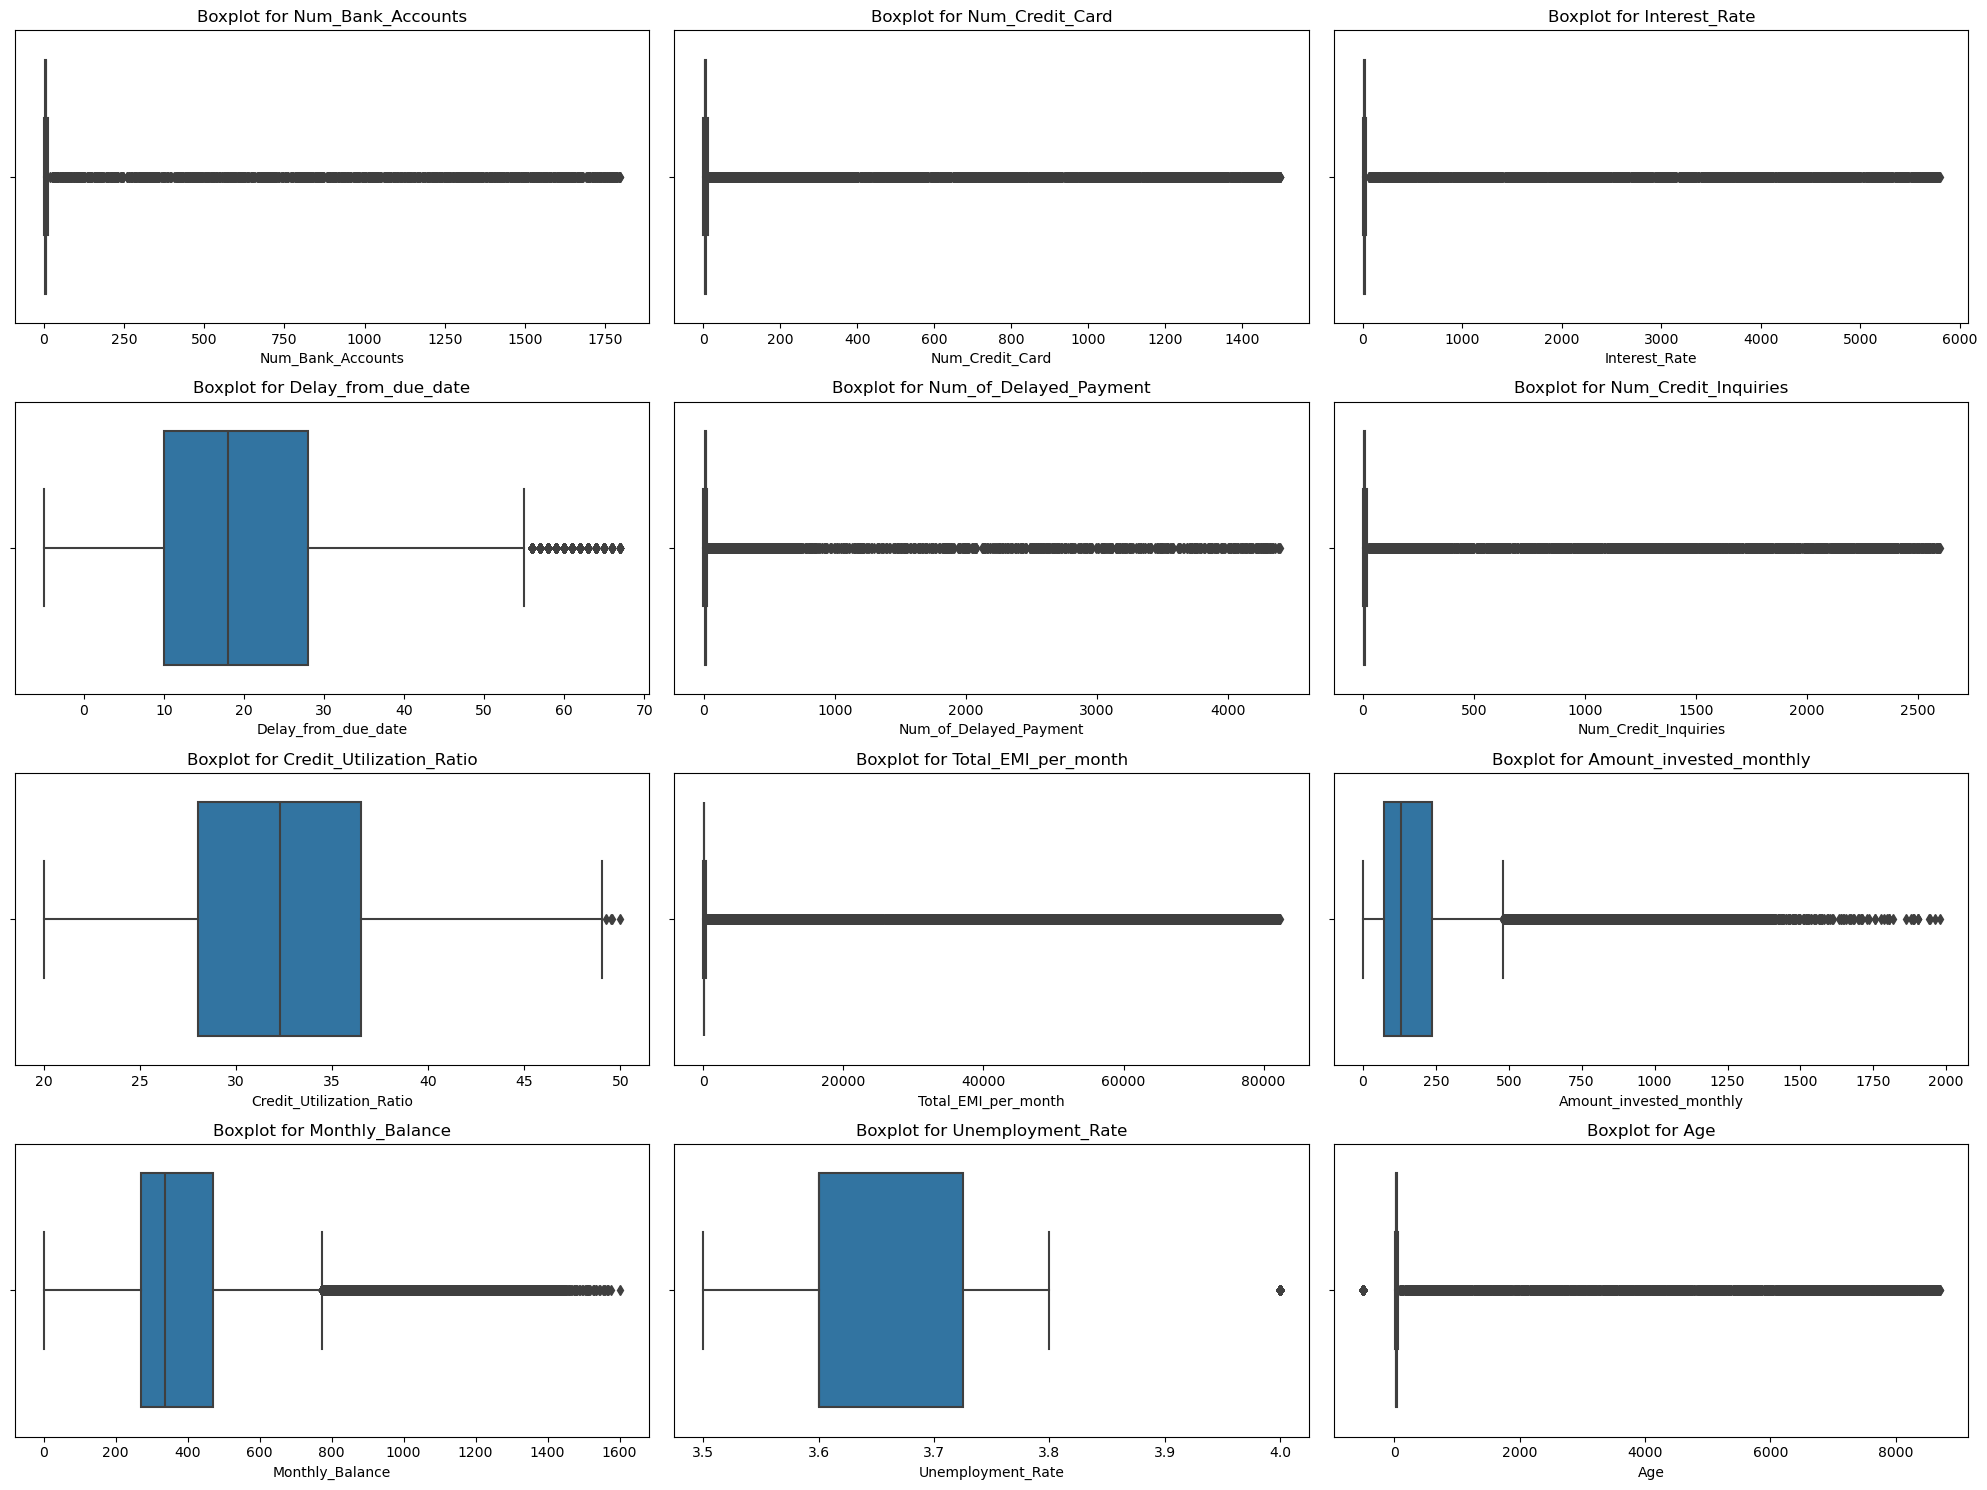

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns_to_plot = [
    'Num_Bank_Accounts', 
    'Num_Credit_Card', 
    'Interest_Rate', 
    'Delay_from_due_date', 
    'Num_of_Delayed_Payment', 
    'Num_Credit_Inquiries', 
    'Credit_Utilization_Ratio', 
    'Total_EMI_per_month', 
    'Amount_invested_monthly', 
    'Monthly_Balance', 
    'Unemployment_Rate',
    'Age'
]

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))  # Adjust size as needed

# Loop through each column and plot
for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 3, i + 1)  # 4 rows, 3 columns, i + 1 for the subplot index
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

* It can be observed that the outliers in the case of Unemployment_Rate, Credit_Utilization_Ratio, Delay_from_due_date are very close to Upper Whisker, which is a possible value and hence, the final columns where we will remove the outliers are:

  1) Num_Bank_Accounts
  2) Num_Credit_Cards
  3) Interest_Rate
  4) Number_of_Delayed_Payments
  5) Num_Credit_Inquiries
  6) Total_EMI_per_month
  7) Amount_invested_monthly
  8) Monthly_Balance
  9) Age

In [70]:
df.dtypes

Customer_ID                         object
Month                       datetime64[ns]
Age                                float64
Occupation                          object
Annual_Income                       object
Num_Bank_Accounts                    int64
Num_Credit_Card                      int64
Interest_Rate                        int64
Num_of_Loan                         object
Type_of_Loan                        object
Delay_from_due_date                  int64
Num_of_Delayed_Payment             float64
Changed_Credit_Limit                object
Num_Credit_Inquiries               float64
Credit_Mix                          object
Outstanding_Debt                    object
Credit_Utilization_Ratio           float64
Credit_History_Age                   int64
Payment_of_Min_Amount               object
Total_EMI_per_month                float64
Amount_invested_monthly            float64
Payment_Behaviour                   object
Monthly_Balance                    float64
Unemploymen

#### 1) Num_Bank_Accounts

In [71]:
df['Num_Bank_Accounts'] = pd.to_numeric(df['Num_Bank_Accounts'], errors='coerce')

In [72]:
# Define the IQR for identifying outliers
Q1 = df['Num_Bank_Accounts'].quantile(0.25)
Q3 = df['Num_Bank_Accounts'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = (df['Num_Bank_Accounts'] < (Q1 - 1.5 * IQR)) | (df['Num_Bank_Accounts'] > (Q3 + 1.5 * IQR))

# Separate the outliers and non-outliers
outliers = df[outlier_mask]
non_outliers = df[~outlier_mask]

# Find common Customer_IDs
common_ids = set(outliers['Customer_ID']).intersection(set(non_outliers['Customer_ID']))

# Count the number of outlier rows with Customer_IDs also in non-outliers
common_outliers_count = len(outliers[outliers['Customer_ID'].isin(common_ids)])
print(f"Number of outlier rows with Customer_IDs also in non-outliers: {common_outliers_count}")

Number of outlier rows with Customer_IDs also in non-outliers: 1315


In [73]:
# Extract values of 'Num_Bank_Accounts' for common Customer_IDs from non-outliers
non_outlier_values = non_outliers[['Customer_ID', 'Num_Bank_Accounts']].dropna().set_index('Customer_ID')

# Replace outlier values for 'Num_Bank_Accounts'
def replace_outliers(row):
    if row['Customer_ID'] in common_ids and outlier_mask[row.name]:
        return non_outlier_values.loc[row['Customer_ID'], 'Num_Bank_Accounts']
    return row['Num_Bank_Accounts']

# Apply the replacement function
df['Num_Bank_Accounts'] = df.apply(replace_outliers, axis=1)

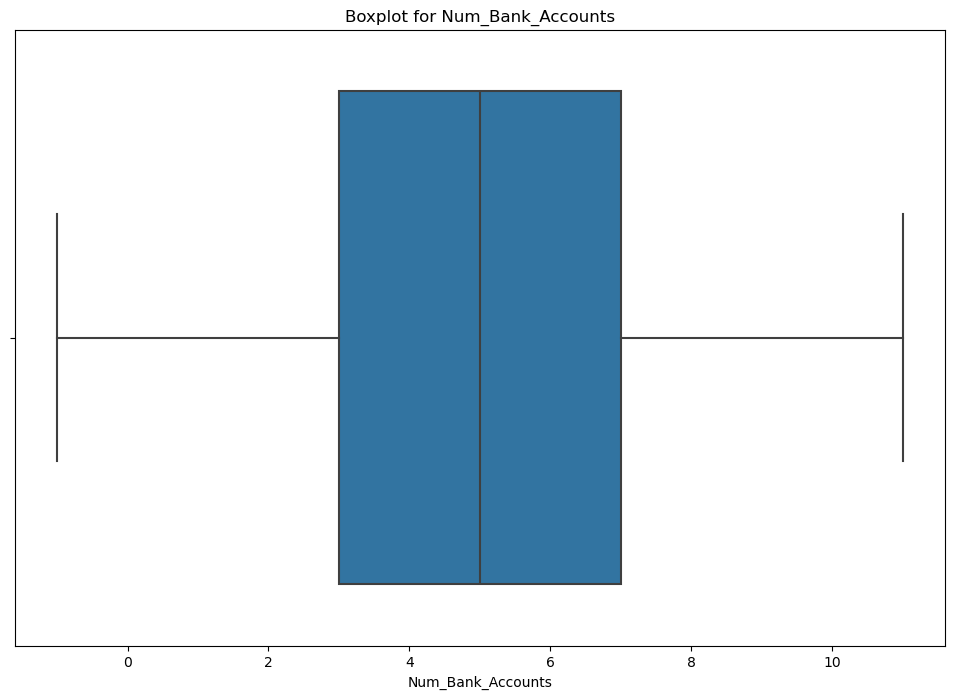

In [74]:
# Convert 'Num_Bank_Accounts' to numeric, forcing errors to NaN (if any)
df['Num_Bank_Accounts'] = pd.to_numeric(df['Num_Bank_Accounts'], errors='coerce')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Create a boxplot for 'Num_Bank_Accounts'
sns.boxplot(x=df['Num_Bank_Accounts'])

# Add title and labels
plt.title('Boxplot for Num_Bank_Accounts')
plt.xlabel('Num_Bank_Accounts')

# Show the plot
plt.show()


#### 2) Num_Credit_Cards

In [75]:
#Convert 'Num_Credit_Card' to numeric, forcing errors to NaN (if any)
df['Num_Credit_Card'] = pd.to_numeric(df['Num_Credit_Card'], errors='coerce')

In [76]:
#Define the IQR for identifying outliers
Q1 = df['Num_Credit_Card'].quantile(0.25)
Q3 = df['Num_Credit_Card'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = (df['Num_Credit_Card'] < (Q1 - 1.5 * IQR)) | (df['Num_Credit_Card'] > (Q3 + 1.5 * IQR))

# Separate the outliers and non-outliers
outliers = df[outlier_mask]
non_outliers = df[~outlier_mask]

# Find common Customer_IDs
common_ids = set(outliers['Customer_ID']).intersection(set(non_outliers['Customer_ID']))

# Count the number of outlier rows with Customer_IDs also in non-outliers
common_outliers_count = len(outliers[outliers['Customer_ID'].isin(common_ids)])
print(f"Number of outlier rows with Customer_IDs also in non-outliers: {common_outliers_count}")

Number of outlier rows with Customer_IDs also in non-outliers: 2271


In [77]:
#Extract values of 'Num_Credit_Card' for common Customer_IDs from non-outliers
non_outlier_values = non_outliers[['Customer_ID', 'Num_Credit_Card']].dropna().set_index('Customer_ID')

# Replace outlier values for 'Num_Credit_Card'
def replace_outliers(row):
    if row['Customer_ID'] in common_ids and outlier_mask[row.name]:
        return non_outlier_values.loc[row['Customer_ID'], 'Num_Credit_Card']
    return row['Num_Credit_Card']

# Apply the replacement function
df['Num_Credit_Card'] = df.apply(replace_outliers, axis=1)

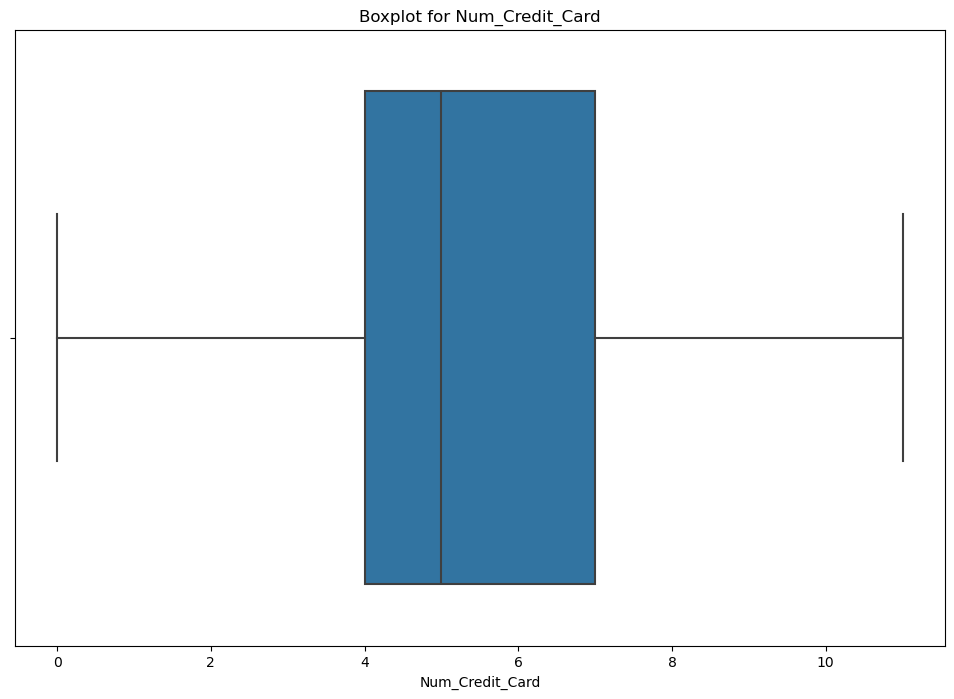

In [78]:
#Convert 'Num_Credit_Card' to numeric, forcing errors to NaN (if any)
df['Num_Credit_Card'] = pd.to_numeric(df['Num_Credit_Card'], errors='coerce')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Create a boxplot for 'Num_Credit_Card'
sns.boxplot(x=df['Num_Credit_Card'])

# Add title and labels
plt.title('Boxplot for Num_Credit_Card')
plt.xlabel('Num_Credit_Card')

# Show the plot
plt.show()

#### 3) Interest_Rate

In [79]:
#Convert 'Interest_Rate' to numeric, forcing errors to NaN (if any)
df['Interest_Rate'] = pd.to_numeric(df['Interest_Rate'], errors='coerce')

In [80]:
# Define the IQR for identifying outliers
Q1 = df['Interest_Rate'].quantile(0.25)
Q3 = df['Interest_Rate'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = (df['Interest_Rate'] < (Q1 - 1.5 * IQR)) | (df['Interest_Rate'] > (Q3 + 1.5 * IQR))

# Separate the outliers and non-outliers
outliers = df[outlier_mask]
non_outliers = df[~outlier_mask]

# Find common Customer_IDs
common_ids = set(outliers['Customer_ID']).intersection(set(non_outliers['Customer_ID']))

# Count the number of outlier rows with Customer_IDs also in non-outliers
common_outliers_count = len(outliers[outliers['Customer_ID'].isin(common_ids)])
print(f"Number of outlier rows with Customer_IDs also in non-outliers: {common_outliers_count}")

Number of outlier rows with Customer_IDs also in non-outliers: 2034


In [81]:
#Extract values of 'Interest_Rate' for common Customer_IDs from non-outliers
non_outlier_values = non_outliers[['Customer_ID', 'Interest_Rate']].dropna().set_index('Customer_ID')

# Replace outlier values for 'Interest_Rate'
def replace_outliers(row):
    if row['Customer_ID'] in common_ids and outlier_mask[row.name]:
        return non_outlier_values.loc[row['Customer_ID'], 'Interest_Rate']
    return row['Interest_Rate']

# Apply the replacement function
df['Interest_Rate'] = df.apply(replace_outliers, axis=1)

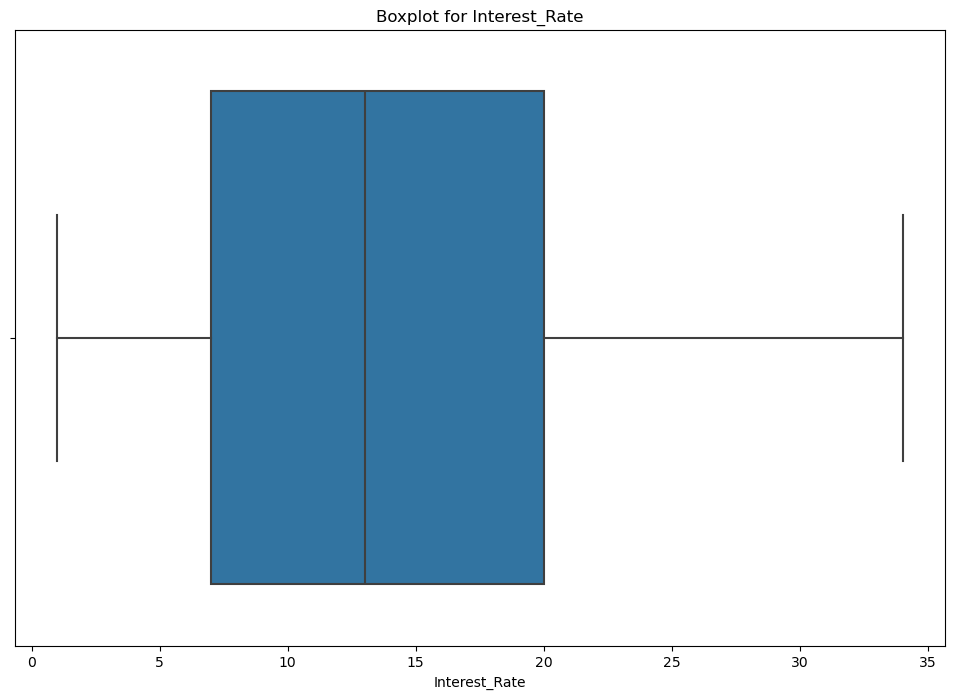

In [82]:
#Convert 'Interest_Rate' to numeric, forcing errors to NaN (if any)
df['Interest_Rate'] = pd.to_numeric(df['Interest_Rate'], errors='coerce')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Create a boxplot for 'Interest_Rate'
sns.boxplot(x=df['Interest_Rate'])

# Add title and labels
plt.title('Boxplot for Interest_Rate')
plt.xlabel('Interest_Rate')

# Show the plot
plt.show()

#### 4) Number_of_Delayed_Payments

In [83]:
#Convert 'Number_of_Delayed_Payments' to numeric, forcing errors to NaN (if any)
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

In [84]:
# Define the IQR for identifying outliers
Q1 = df['Num_of_Delayed_Payment'].quantile(0.25)
Q3 = df['Num_of_Delayed_Payment'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = (df['Num_of_Delayed_Payment'] < (Q1 - 1.5 * IQR)) | (df['Num_of_Delayed_Payment'] > (Q3 + 1.5 * IQR))

# Separate the outliers and non-outliers
outliers = df[outlier_mask]
non_outliers = df[~outlier_mask]

# Find common Customer_IDs
common_ids = set(outliers['Customer_ID']).intersection(set(non_outliers['Customer_ID']))

# Count the number of outlier rows with Customer_IDs also in non-outliers
common_outliers_count = len(outliers[outliers['Customer_ID'].isin(common_ids)])
print(f"Number of outlier rows with Customer_IDs also in non-outliers: {common_outliers_count}")

Number of outlier rows with Customer_IDs also in non-outliers: 1154


In [85]:
# Extract values of 'Number_of_Delayed_Payments' for common Customer_IDs from non-outliers
non_outlier_values = non_outliers[['Customer_ID', 'Num_of_Delayed_Payment']].dropna().set_index('Customer_ID')

# Replace outlier values for 'Number_of_Delayed_Payments'
def replace_outliers(row):
    if row['Customer_ID'] in common_ids and outlier_mask[row.name]:
        return non_outlier_values.loc[row['Customer_ID'], 'Num_of_Delayed_Payment']
    return row['Num_of_Delayed_Payment']

# Apply the replacement function
df['Num_of_Delayed_Payment'] = df.apply(replace_outliers, axis=1)

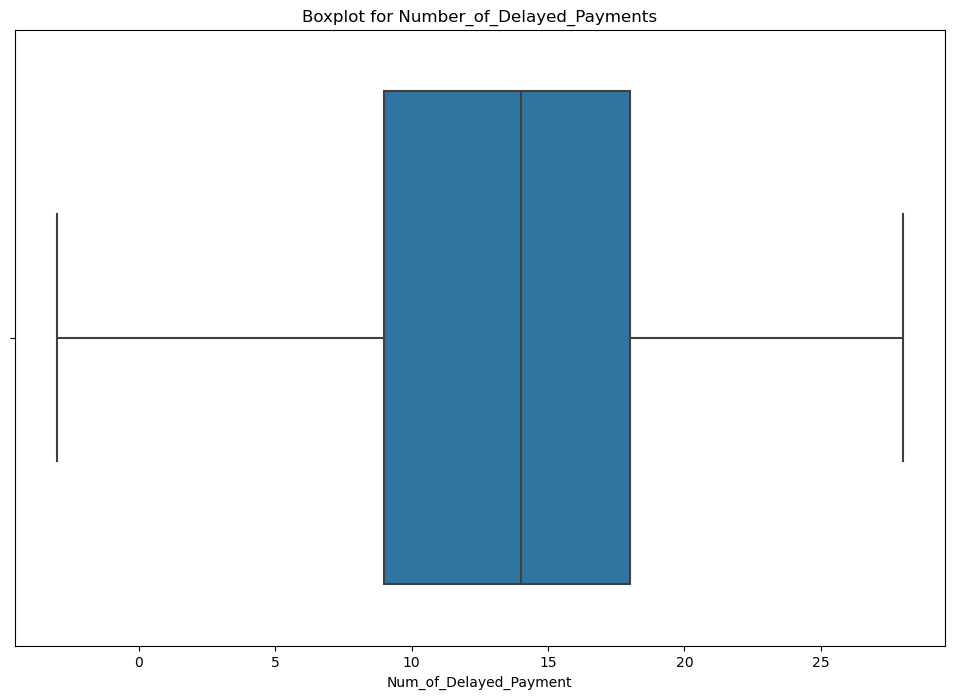

In [86]:
# Convert 'Number_of_Delayed_Payments' to numeric, forcing errors to NaN (if any)
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Create a boxplot for 'Number_of_Delayed_Payments'
sns.boxplot(x=df['Num_of_Delayed_Payment'])

# Add title and labels
plt.title('Boxplot for Number_of_Delayed_Payments')
plt.xlabel('Num_of_Delayed_Payment')

# Show the plot
plt.show()

#### 5) Num_Credit_Inquiries

In [87]:
# 1. Convert 'Num_Credit_Inquiries' to numeric, forcing errors to NaN (if any)
df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce')

In [88]:
# 2. Define the IQR for identifying outliers
Q1 = df['Num_Credit_Inquiries'].quantile(0.25)
Q3 = df['Num_Credit_Inquiries'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = (df['Num_Credit_Inquiries'] < (Q1 - 1.5 * IQR)) | (df['Num_Credit_Inquiries'] > (Q3 + 1.5 * IQR))

# Separate the outliers and non-outliers
outliers = df[outlier_mask]
non_outliers = df[~outlier_mask]

# Find common Customer_IDs
common_ids = set(outliers['Customer_ID']).intersection(set(non_outliers['Customer_ID']))

# Count the number of outlier rows with Customer_IDs also in non-outliers
common_outliers_count = len(outliers[outliers['Customer_ID'].isin(common_ids)])
print(f"Number of outlier rows with Customer_IDs also in non-outliers: {common_outliers_count}")

Number of outlier rows with Customer_IDs also in non-outliers: 1839


In [89]:
# 3. Extract values of 'Num_Credit_Inquiries' for common Customer_IDs from non-outliers
non_outlier_values = non_outliers[['Customer_ID', 'Num_Credit_Inquiries']].dropna().set_index('Customer_ID')

# Replace outlier values for 'Num_Credit_Inquiries'
def replace_outliers(row):
    if row['Customer_ID'] in common_ids and outlier_mask[row.name]:
        return non_outlier_values.loc[row['Customer_ID'], 'Num_Credit_Inquiries']
    return row['Num_Credit_Inquiries']

# Apply the replacement function
df['Num_Credit_Inquiries'] = df.apply(replace_outliers, axis=1)

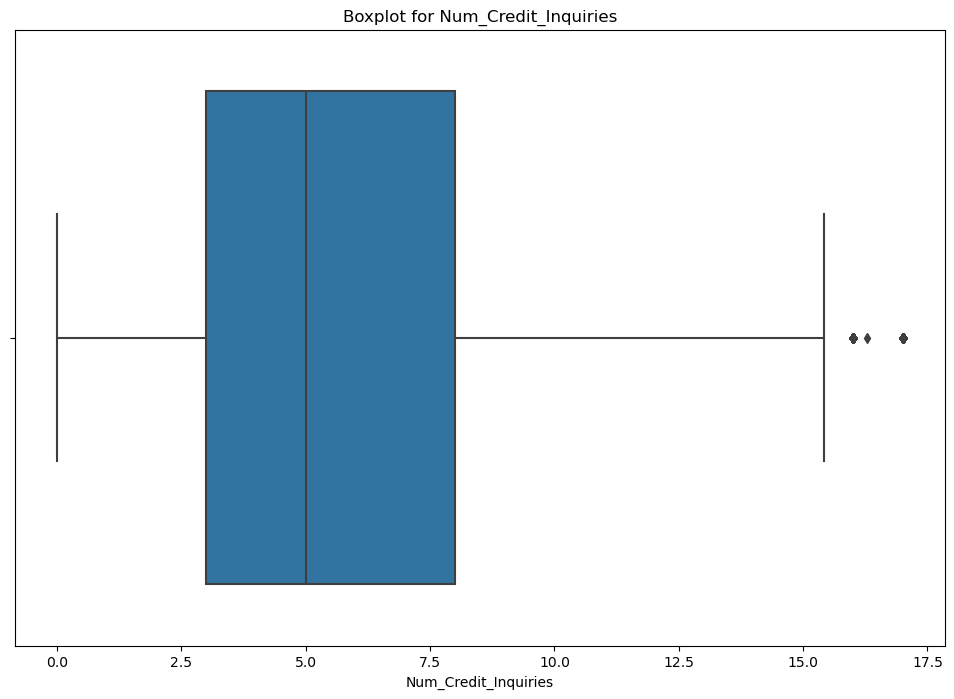

In [90]:
# 4. Convert 'Num_Credit_Inquiries' to numeric, forcing errors to NaN (if any)
df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Create a boxplot for 'Num_Credit_Inquiries'
sns.boxplot(x=df['Num_Credit_Inquiries'])

# Add title and labels
plt.title('Boxplot for Num_Credit_Inquiries')
plt.xlabel('Num_Credit_Inquiries')

# Show the plot
plt.show()

#### 6) Total_EMI_per_month

In [91]:
# 1. Convert 'Amount_invested_monthly' to numeric, forcing errors to NaN (if any)
df['Total_EMI_per_month'] = pd.to_numeric(df['Total_EMI_per_month'], errors='coerce')

In [92]:
# 2. Define the IQR for identifying outliers
Q1 = df['Total_EMI_per_month'].quantile(0.25)
Q3 = df['Total_EMI_per_month'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = (df['Total_EMI_per_month'] < (Q1 - 1.5 * IQR)) | (df['Total_EMI_per_month'] > (Q3 + 1.5 * IQR))

# Separate the outliers and non-outliers
outliers = df[outlier_mask]
non_outliers = df[~outlier_mask]

# Find common Customer_IDs
common_ids = set(outliers['Customer_ID']).intersection(set(non_outliers['Customer_ID']))

# Count the number of outlier rows with Customer_IDs also in non-outliers
common_outliers_count = len(outliers[outliers['Customer_ID'].isin(common_ids)])
print(f"Number of outlier rows with Customer_IDs also in non-outliers: {common_outliers_count}")

Number of outlier rows with Customer_IDs also in non-outliers: 4419


In [93]:
# 3. Extract values of 'Amount_invested_monthly' for common Customer_IDs from non-outliers
non_outlier_values = non_outliers[['Customer_ID', 'Total_EMI_per_month']].dropna().set_index('Customer_ID')

# Replace outlier values for 'Amount_invested_monthly'
def replace_outliers(row):
    if row['Customer_ID'] in common_ids and outlier_mask[row.name]:
        return non_outlier_values.loc[row['Customer_ID'], 'Total_EMI_per_month']
    return row['Total_EMI_per_month']

# Apply the replacement function
df['Total_EMI_per_month'] = df.apply(replace_outliers, axis=1)

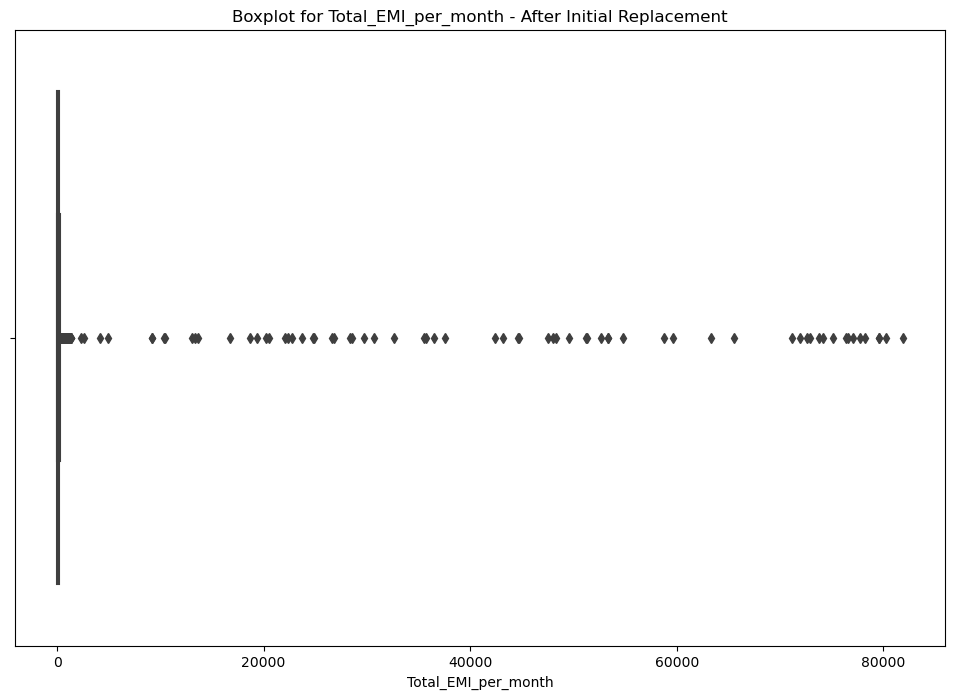

In [94]:
# 4. Convert 'Amount_invested_monthly' to numeric, forcing errors to NaN (if any)
df['Total_EMI_per_month'] = pd.to_numeric(df['Total_EMI_per_month'], errors='coerce')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Create a boxplot for 'Amount_invested_monthly' after initial outlier replacement
sns.boxplot(x=df['Total_EMI_per_month'])

# Add title and labels
plt.title('Boxplot for Total_EMI_per_month - After Initial Replacement')
plt.xlabel('Total_EMI_per_month')

# Show the plot
plt.show()

In [95]:
# 5. Calculate the mean value of 'Amount_invested_monthly'
median_value = df['Total_EMI_per_month'].median()

Q1 = df['Total_EMI_per_month'].quantile(0.25)
Q3 = df['Total_EMI_per_month'].quantile(0.75)
IQR = Q3 - Q1

# Replace rows where 'Amount_invested_monthly' is greater than the upper bound of IQR with the mean value
df.loc[df['Total_EMI_per_month'] >= (Q3 + 1.5 * IQR), 'Total_EMI_per_month'] = median_value

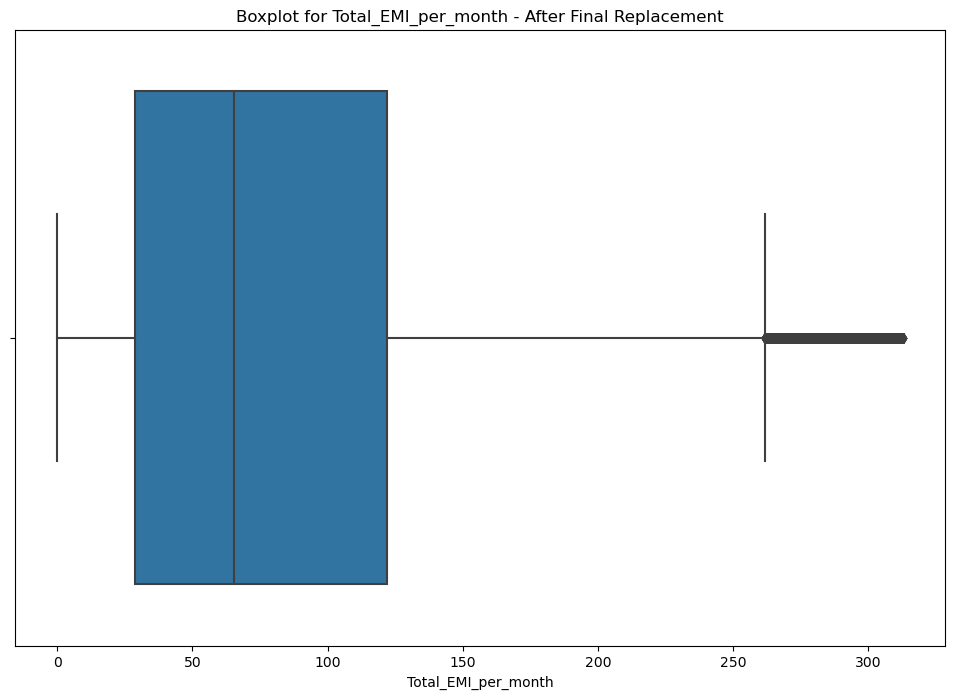

In [96]:
# 6. Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Create a boxplot for 'Amount_invested_monthly' after final replacement
sns.boxplot(x=df['Total_EMI_per_month'])

# Add title and labels
plt.title('Boxplot for Total_EMI_per_month - After Final Replacement')
plt.xlabel('Total_EMI_per_month')

# Show the plot
plt.show()

#### 7) Amount_invested_monthly

In [97]:
# 1. Convert 'Amount_invested_monthly' to numeric, forcing errors to NaN (if any)
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

In [98]:
# 2. Define the IQR for identifying outliers
Q1 = df['Amount_invested_monthly'].quantile(0.25)
Q3 = df['Amount_invested_monthly'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = (df['Amount_invested_monthly'] < (Q1 - 1.5 * IQR)) | (df['Amount_invested_monthly'] > (Q3 + 1.5 * IQR))

# Separate the outliers and non-outliers
outliers = df[outlier_mask]
non_outliers = df[~outlier_mask]

# Find common Customer_IDs
common_ids = set(outliers['Customer_ID']).intersection(set(non_outliers['Customer_ID']))

# Count the number of outlier rows with Customer_IDs also in non-outliers
common_outliers_count = len(outliers[outliers['Customer_ID'].isin(common_ids)])
print(f"Number of outlier rows with Customer_IDs also in non-outliers: {common_outliers_count}")

Number of outlier rows with Customer_IDs also in non-outliers: 8195


In [99]:
# 3. Extract median values of 'Amount_invested_monthly' for common Customer_IDs from non-outliers
non_outlier_values = non_outliers.groupby('Customer_ID')['Amount_invested_monthly'].median()

# Replace outlier values for 'Amount_invested_monthly'
def replace_outliers(row):
    if row['Customer_ID'] in common_ids and outlier_mask[row.name]:
        return non_outlier_values.get(row['Customer_ID'], row['Amount_invested_monthly'])
    return row['Amount_invested_monthly']

# Apply the replacement function
df['Amount_invested_monthly'] = df.apply(replace_outliers, axis=1)

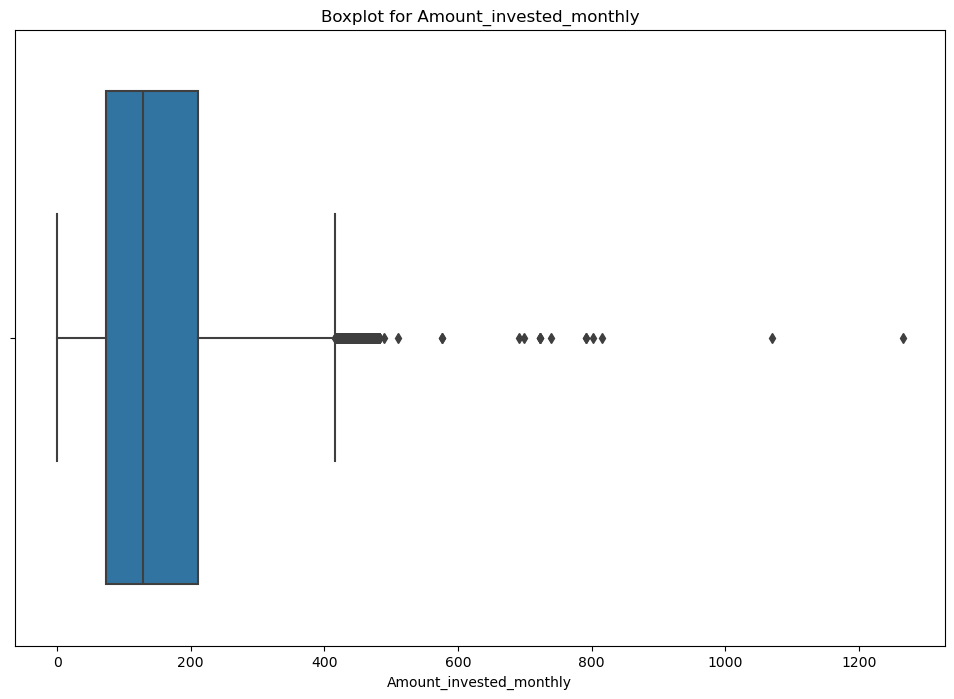

In [100]:
# 4. Convert 'Amount_invested_monthly' to numeric, forcing errors to NaN (if any)
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Create a boxplot for 'Amount_invested_monthly'
sns.boxplot(x=df['Amount_invested_monthly'])

# Add title and labels
plt.title('Boxplot for Amount_invested_monthly')
plt.xlabel('Amount_invested_monthly')

# Show the plot
plt.show()

In [101]:
# 2. Calculate the mean value of 'Amount_invested_monthly'
mean_value = df['Amount_invested_monthly'].median()

Q1 = df['Amount_invested_monthly'].quantile(0.25)
Q3 = df['Amount_invested_monthly'].quantile(0.75)
IQR = Q3 - Q1

# 3. Replace rows where 'Amount_invested_monthly' is  with the mean value
df.loc[df['Amount_invested_monthly'] >= (Q3 + 1.5 * IQR), 'Amount_invested_monthly'] = mean_value

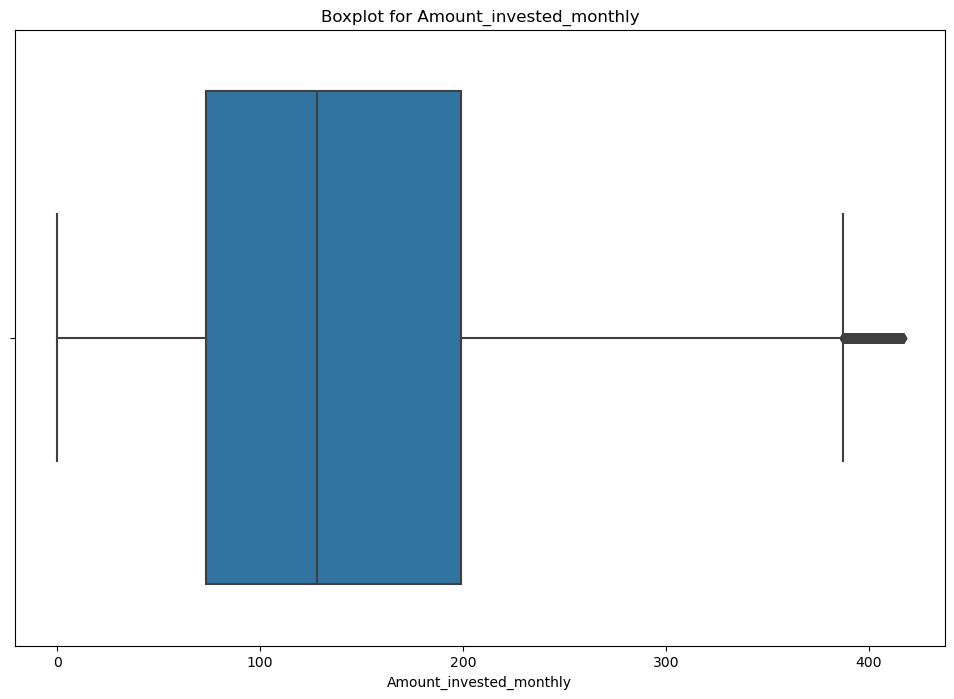

In [102]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Create a boxplot for 'Amount_invested_monthly'
sns.boxplot(x=df['Amount_invested_monthly'])

# Add title and labels
plt.title('Boxplot for Amount_invested_monthly')
plt.xlabel('Amount_invested_monthly')

# Show the plot
plt.show()

#### 8) Monthly_Balance

In [103]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

In [104]:
# Define the IQR for identifying outliers
Q1 = df['Monthly_Balance'].quantile(0.25)
Q3 = df['Monthly_Balance'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = (df['Monthly_Balance'] < (Q1 - 1.5 * IQR)) | (df['Monthly_Balance'] > (Q3 + 1.5 * IQR))

# Separate the outliers and non-outliers
outliers = df[outlier_mask]
non_outliers = df[~outlier_mask]

# Find common Customer_IDs
common_ids = set(outliers['Customer_ID']).intersection(set(non_outliers['Customer_ID']))

# Count the number of outlier rows with Customer_IDs also in non-outliers
common_outliers_count = len(outliers[outliers['Customer_ID'].isin(common_ids)])
print(f"Number of outlier rows with Customer_IDs also in non-outliers: {common_outliers_count}")

Number of outlier rows with Customer_IDs also in non-outliers: 7241


In [105]:
# Extract values of 'Num_Bank_Accounts' for common Customer_IDs from non-outliers
non_outlier_values = non_outliers[['Customer_ID', 'Monthly_Balance']].dropna().set_index('Customer_ID')

# Replace outlier values for 'Num_Bank_Accounts'
def replace_outliers(row):
    if row['Customer_ID'] in common_ids and outlier_mask[row.name]:
        return non_outlier_values.loc[row['Customer_ID'], 'Monthly_Balance']
    return row['Monthly_Balance']

# Apply the replacement function
df['Monthly_Balance'] = df.apply(replace_outliers, axis=1)

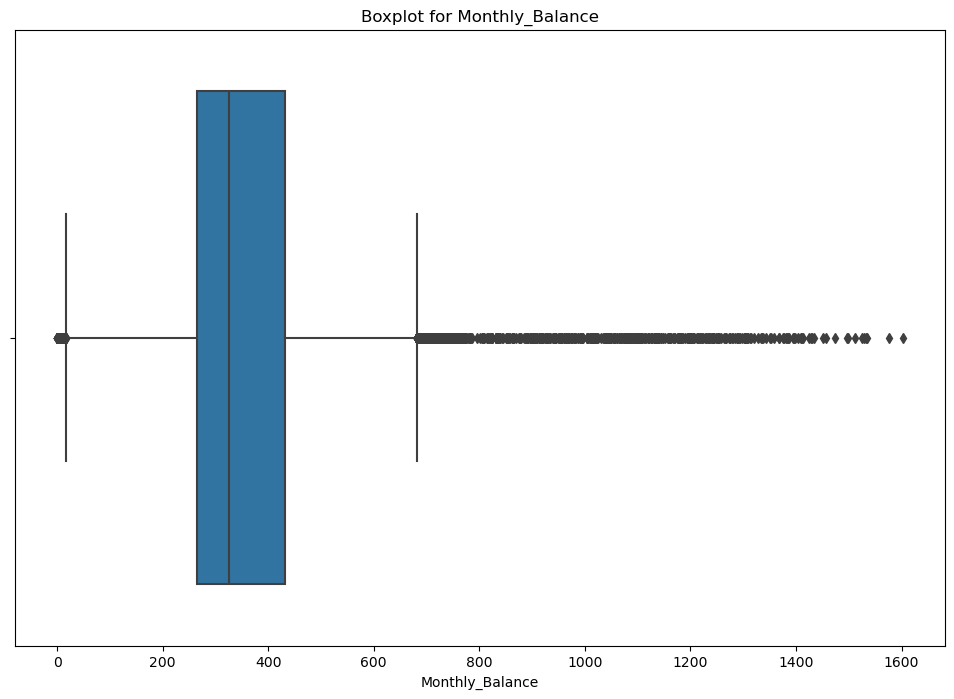

In [106]:
# Convert 'Num_Bank_Accounts' to numeric, forcing errors to NaN (if any)
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Create a boxplot for 'Num_Bank_Accounts'
sns.boxplot(x=df['Monthly_Balance'])

# Add title and labels
plt.title('Boxplot for Monthly_Balance')
plt.xlabel('Monthly_Balance')

# Show the plot
plt.show()

In [107]:
# 2. Calculate the mean value of 'Amount_invested_monthly'
mean_value = df['Monthly_Balance'].median()

Q1 = df['Monthly_Balance'].quantile(0.25)
Q3 = df['Monthly_Balance'].quantile(0.75)
IQR = Q3 - Q1

# 3. Replace rows where 'Amount_invested_monthly' is  with the mean value
df.loc[df['Monthly_Balance'] >= (Q3 + 1.5 * IQR), 'Monthly_Balance'] = mean_value
# Replace negative values with 0
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(lambda x: max(x, 0))

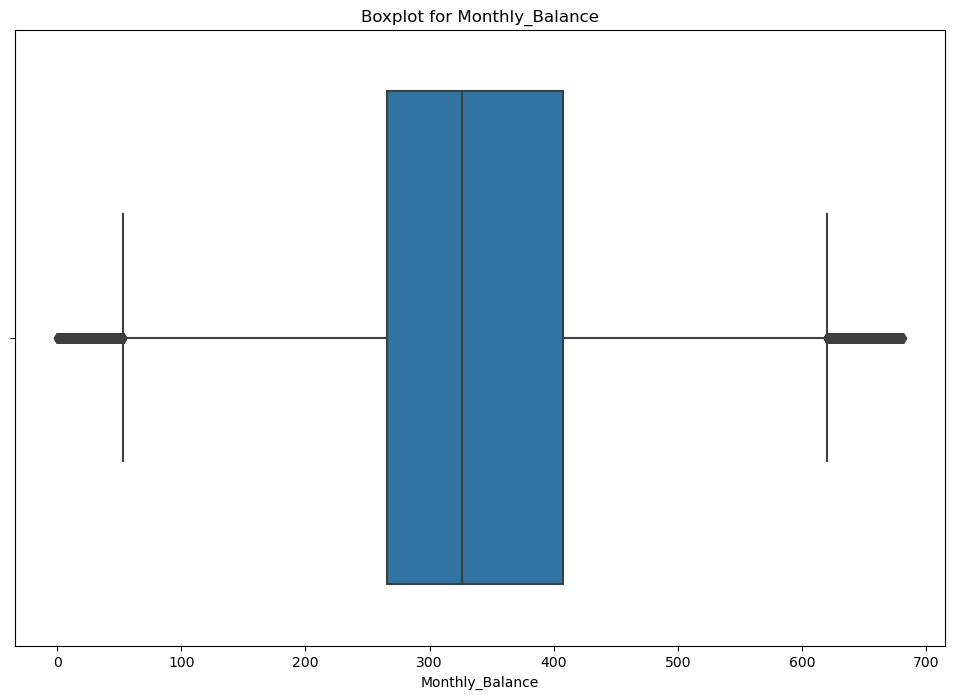

In [108]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Create a boxplot for 'Amount_invested_monthly'
sns.boxplot(x=df['Monthly_Balance'])

# Add title and labels
plt.title('Boxplot for Monthly_Balance')
plt.xlabel('Monthly_Balance')

# Show the plot
plt.show()

#### 9) Age

In [109]:
#Convert 'Number_of_Delayed_Payments' to numeric, forcing errors to NaN (if any)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [110]:
# Define the IQR for identifying outliers
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = (df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))

# Separate the outliers and non-outliers
outliers = df[outlier_mask]
non_outliers = df[~outlier_mask]

# Find common Customer_IDs
common_ids = set(outliers['Customer_ID']).intersection(set(non_outliers['Customer_ID']))

# Count the number of outlier rows with Customer_IDs also in non-outliers
common_outliers_count = len(outliers[outliers['Customer_ID'].isin(common_ids)])
print(f"Number of outlier rows with Customer_IDs also in non-outliers: {common_outliers_count}")

Number of outlier rows with Customer_IDs also in non-outliers: 2696


In [111]:
# Extract values of 'Number_of_Delayed_Payments' for common Customer_IDs from non-outliers
non_outlier_values = non_outliers[['Customer_ID', 'Age']].dropna().set_index('Customer_ID')

# Replace outlier values for 'Number_of_Delayed_Payments'
def replace_outliers(row):
    if row['Customer_ID'] in common_ids and outlier_mask[row.name]:
        return non_outlier_values.loc[row['Customer_ID'], 'Age']
    return row['Age']

# Apply the replacement function
df['Age'] = df.apply(replace_outliers, axis=1)

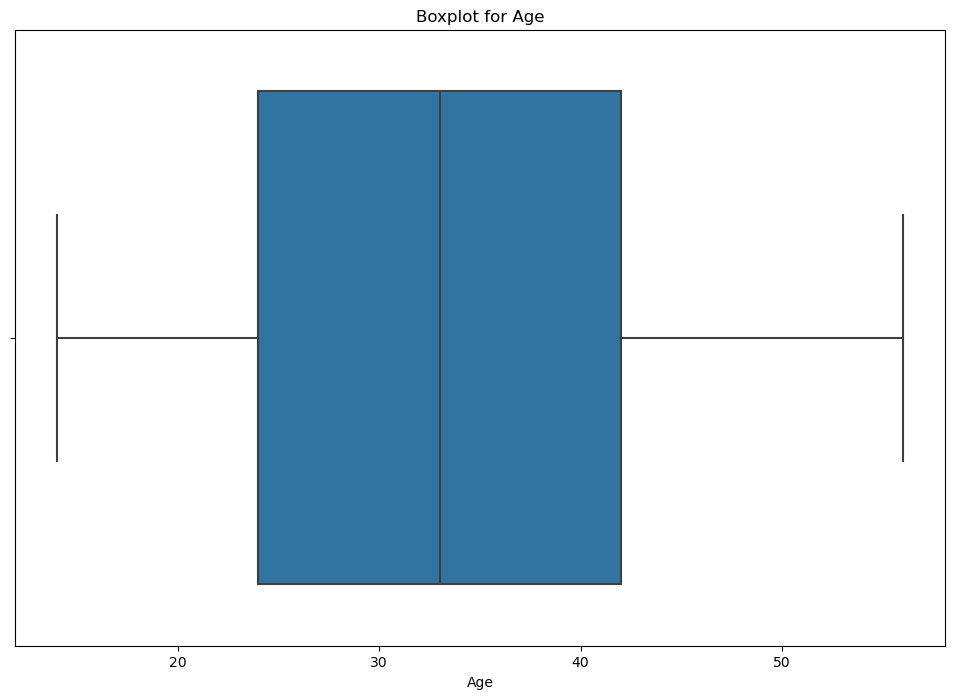

In [112]:
# Convert 'Number_of_Delayed_Payments' to numeric, forcing errors to NaN (if any)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust size as needed

# Create a boxplot for 'Number_of_Delayed_Payments'
sns.boxplot(x=df['Age'])

# Add title and labels
plt.title('Boxplot for Age')
plt.xlabel('Age')

# Show the plot
plt.show()

### Boxplot of columns after dealing with Outliers

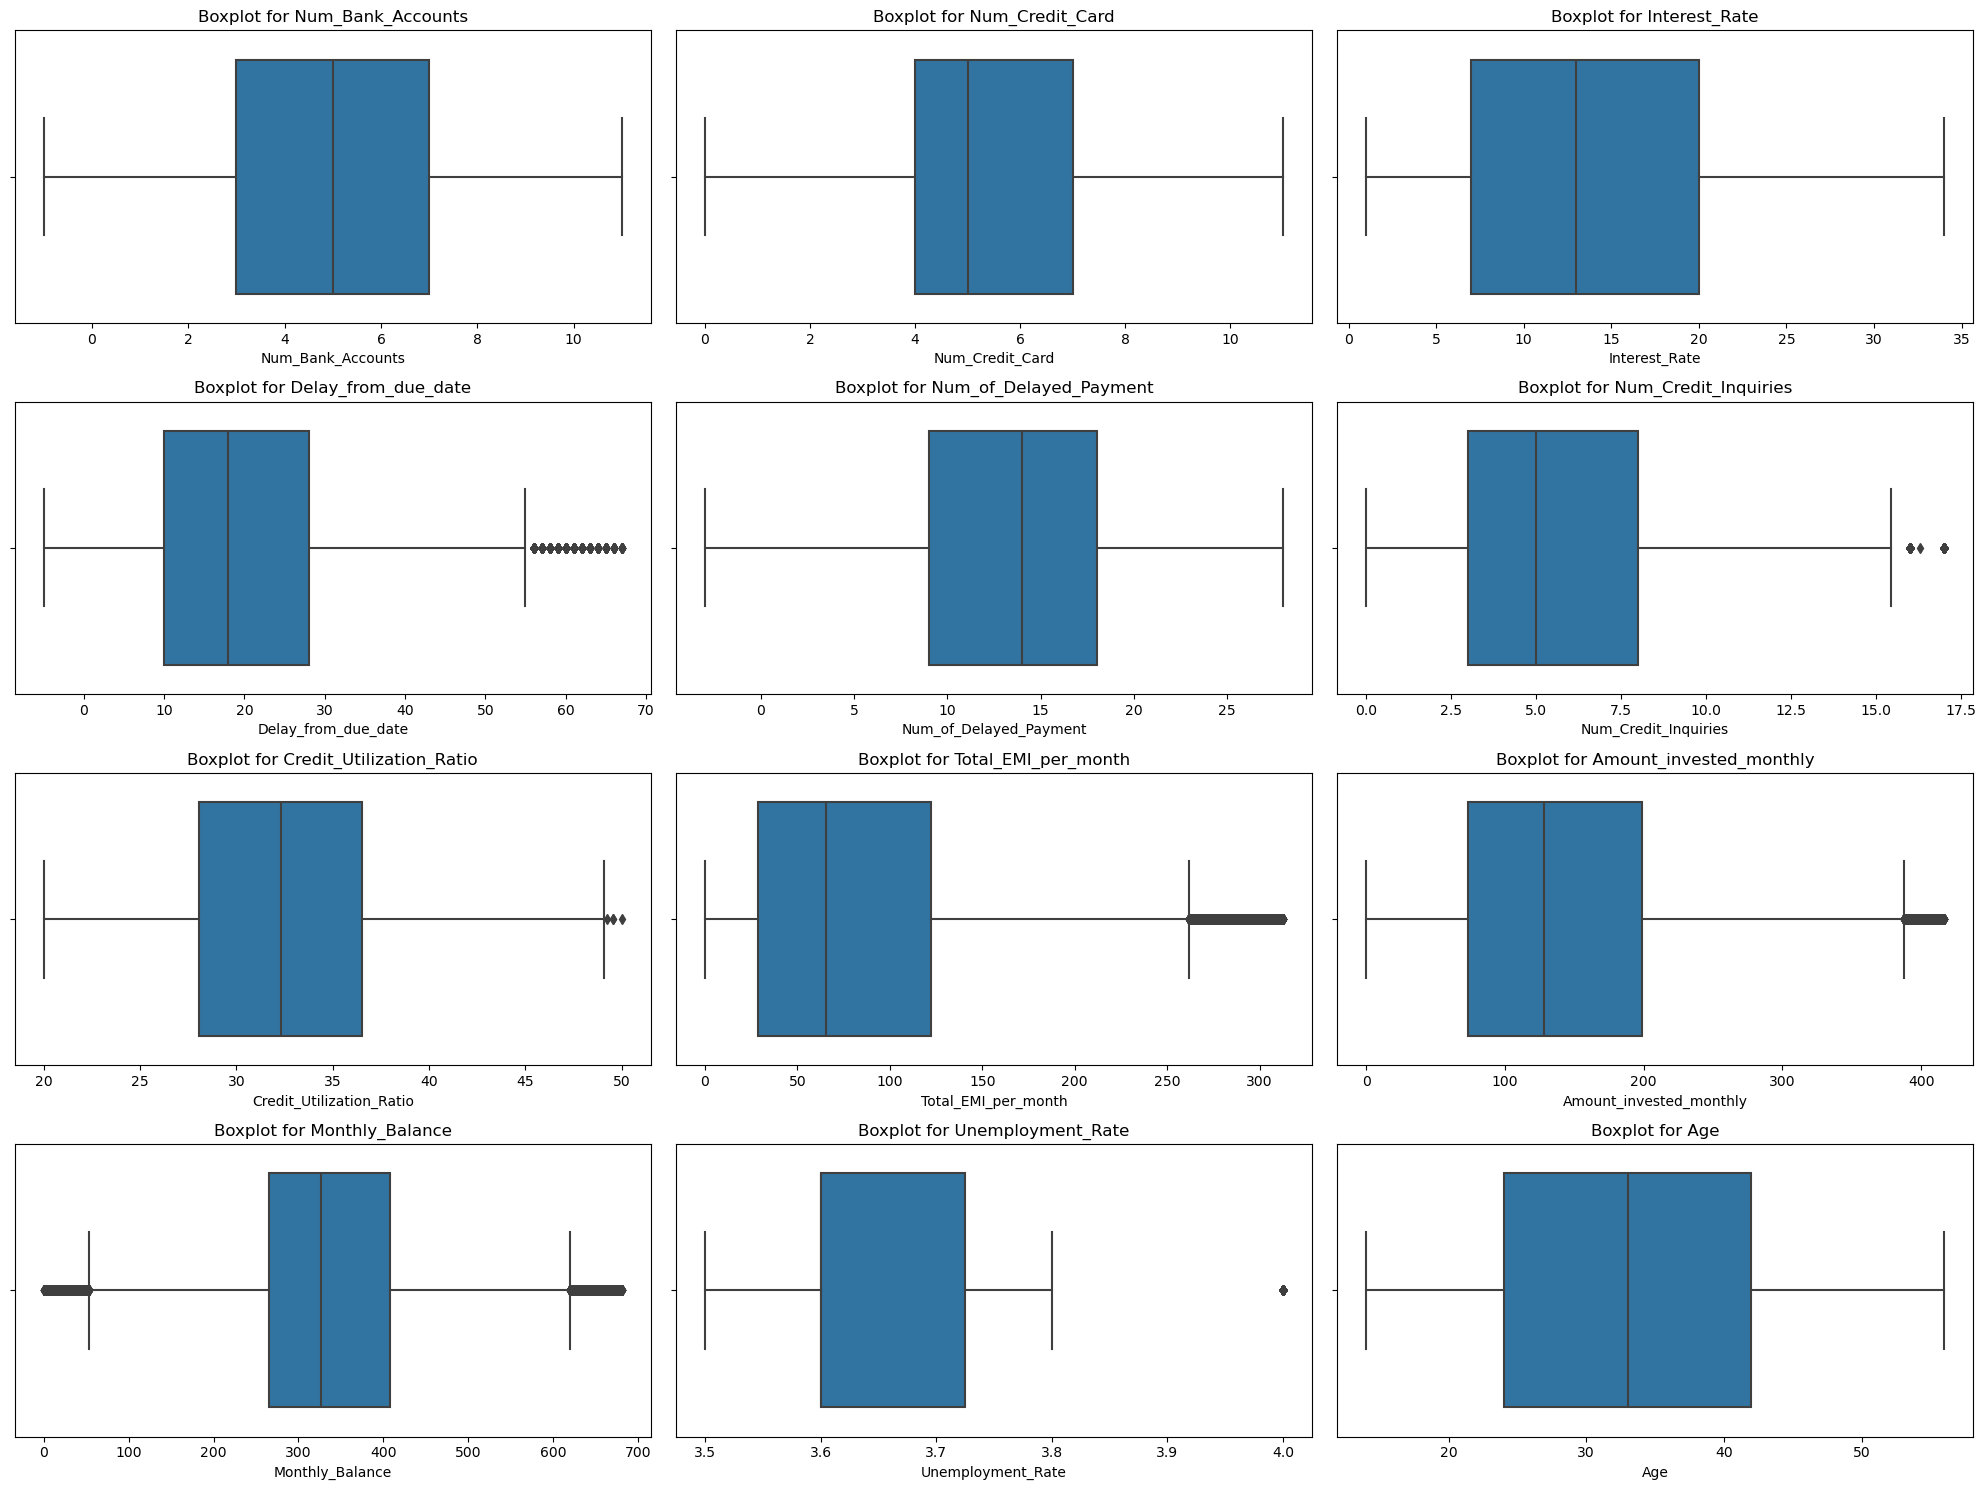

In [113]:
# List of columns to plot
columns_to_plot = [
    'Num_Bank_Accounts', 
    'Num_Credit_Card', 
    'Interest_Rate', 
    'Delay_from_due_date', 
    'Num_of_Delayed_Payment', 
    'Num_Credit_Inquiries', 
    'Credit_Utilization_Ratio', 
    'Total_EMI_per_month', 
    'Amount_invested_monthly', 
    'Monthly_Balance', 
    'Unemployment_Rate',
    'Age'
]

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))  # Adjust size as needed

# Loop through each column and plot
for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 3, i + 1)  # 4 rows, 3 columns, i + 1 for the subplot index
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

* Now that I have cleaned the dataset, I can drop the Customer ID column.

In [114]:
# Drop the 'Customer_ID' column
df = df.drop(columns=['Customer_ID'])

In [151]:
df.head(5)

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Unemployment_Rate,Credit_Score,Age_Group,Loan_Category
0,2022-01-01,23.0,Scientist,19114.12,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,4.0,Good,20-30,Other
1,2022-02-01,23.0,Scientist,19114.12,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,268,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,3.8,Good,20-30,Other
2,2022-03-01,NaN,Scientist,19114.12,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3.6,Good,NaN,Other
3,2022-04-01,23.0,Scientist,19114.12,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3.7,Good,20-30,Other
4,2022-05-01,23.0,Scientist,19114.12,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3.6,Good,20-30,Other


### 10 Visualizations

#### 1) Histogram of Age Distribution

/Users/lohithramesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


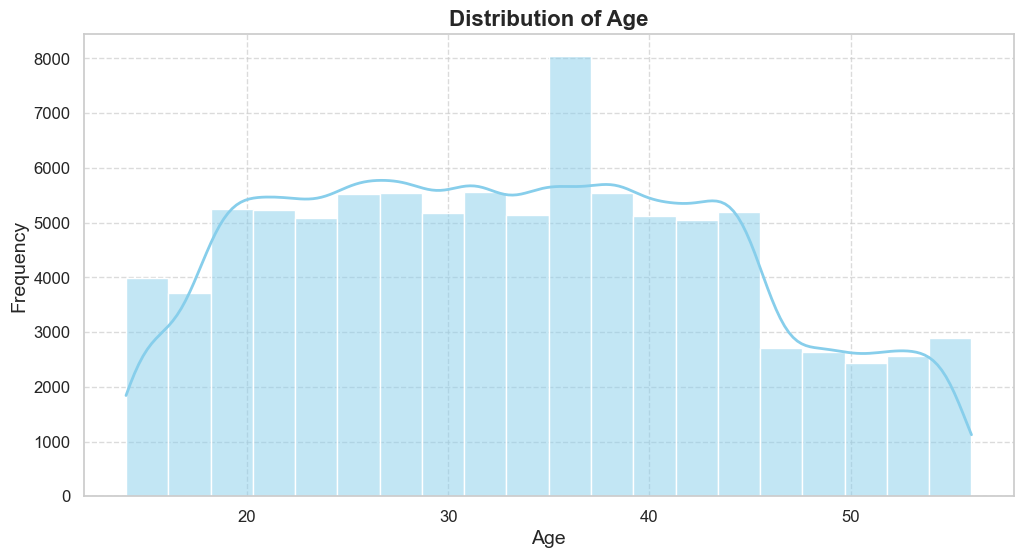

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure with a white grid style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a histogram with KDE for the 'Age' column
sns.histplot(df['Age'].dropna(), bins=20, kde=True, color='skyblue', line_kws={'color': 'darkblue', 'lw': 2})

# Add title and labels with custom font settings
plt.title('Distribution of Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

* The Histogram shows the distribution of ages in your dataset, helping you understand the age range and frequency of different age groups.

#### 2) Boxplot of Monthly Amount Invested

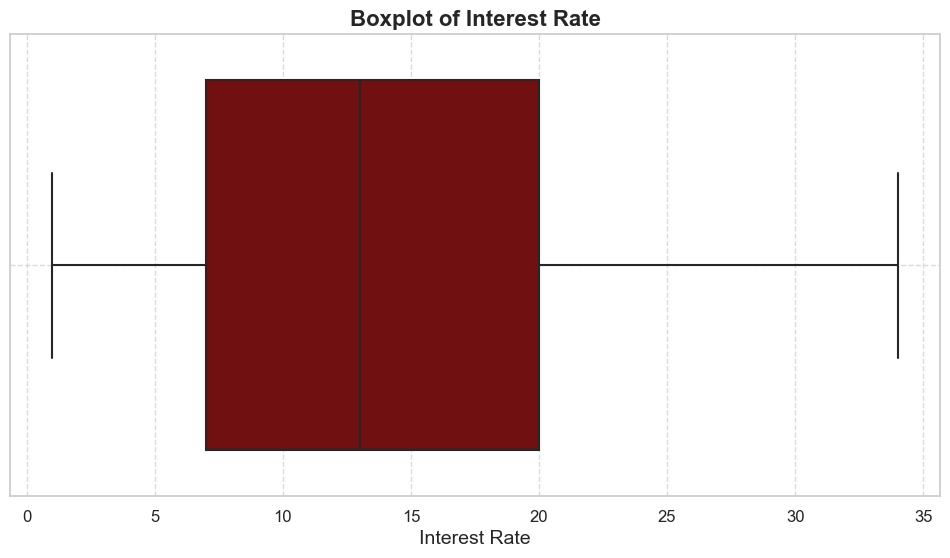

In [137]:
# Set up the matplotlib figure with a white grid style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a boxplot for the 'Interest_Rate' column
sns.boxplot(x=df['Interest_Rate'], color='maroon', fliersize=8, linewidth=1.5)

# Add title and labels with custom font settings
plt.title('Boxplot of Interest Rate', fontsize=16, fontweight='bold')
plt.xlabel('Interest Rate', fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

* Displays the spread and potential outliers in the monthly investment amounts, giving insights into the overall distribution and extreme values.

#### 3) Violin Plot of Monthly Investment by Age Group

/Users/lohithramesh/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


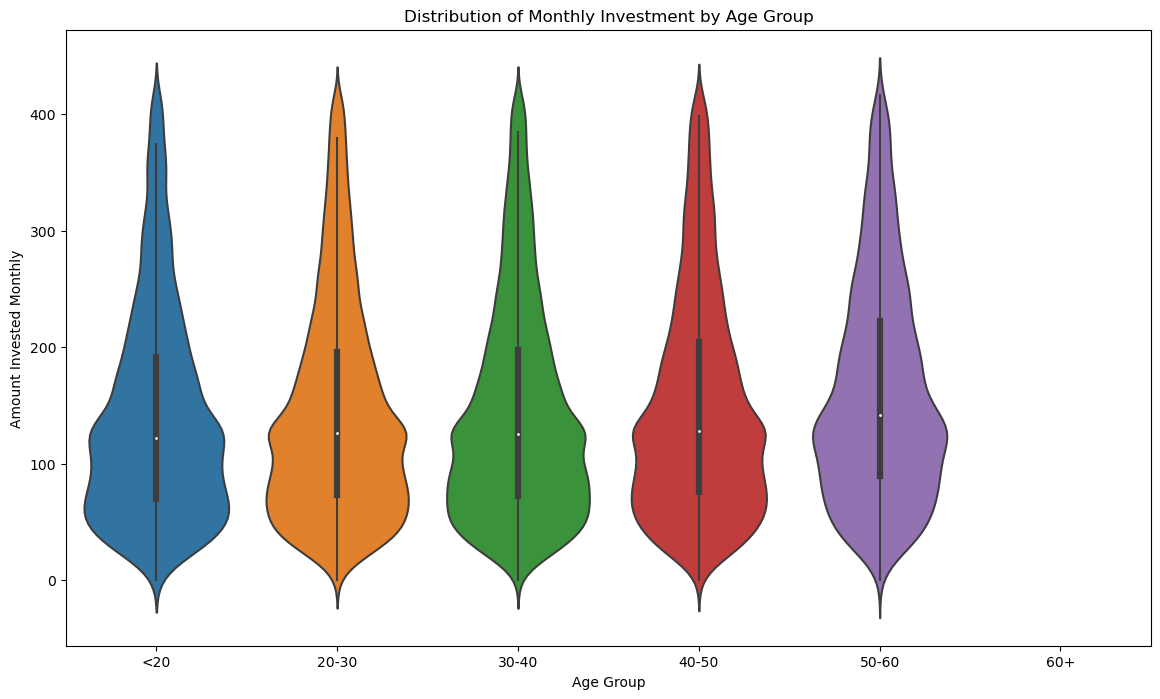

In [124]:
plt.figure(figsize=(14, 8))
age_bins = [0, 20, 30, 40, 50, 60, 100]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=['<20', '20-30', '30-40', '40-50', '50-60', '60+'])
sns.violinplot(x='Age_Group', y='Amount_invested_monthly', data=df)
plt.title('Distribution of Monthly Investment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Amount Invested Monthly')
plt.show()

* Provides a detailed distribution of monthly investment amounts within different age groups, illustrating variance and density.

#### 4) Box Plot of Average Amount_invested_monthly by Occupation

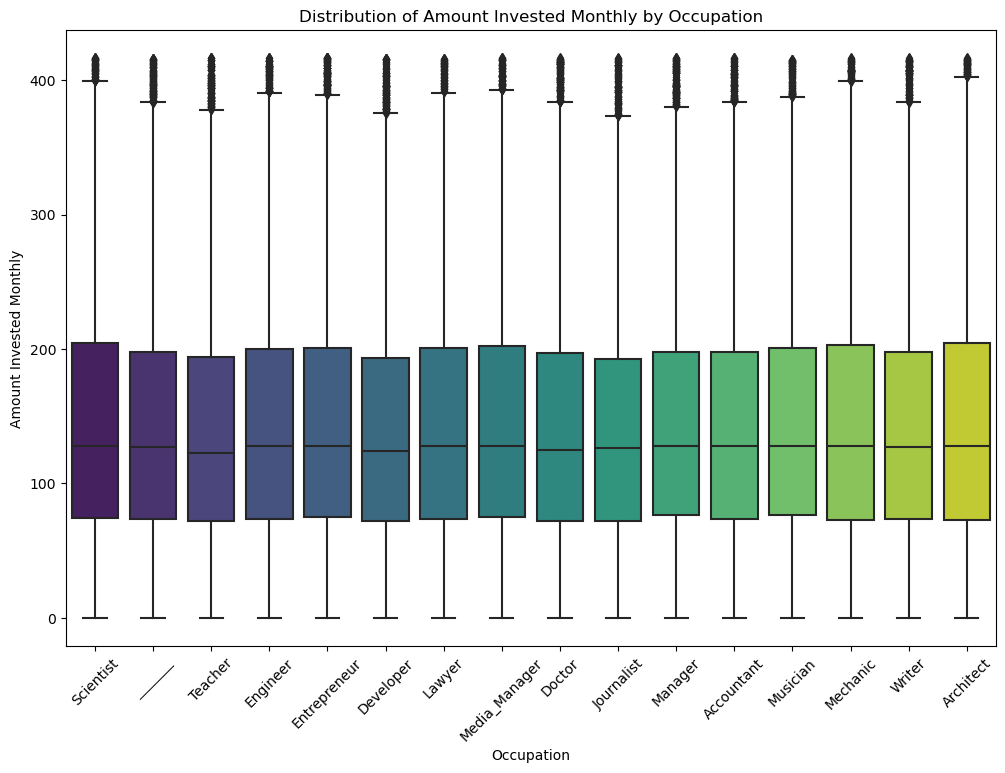

In [133]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a box plot for 'Amount_invested_monthly' by 'Occupation'
sns.boxplot(x='Occupation', y='Amount_invested_monthly', data=df, palette='viridis')

# Add title and labels
plt.title('Distribution of Amount Invested Monthly by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Amount Invested Monthly')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

* Displays the average monthly investment across different occupations, highlighting the average spending behavior.

#### 5) Barplot of Frequency of each loan type

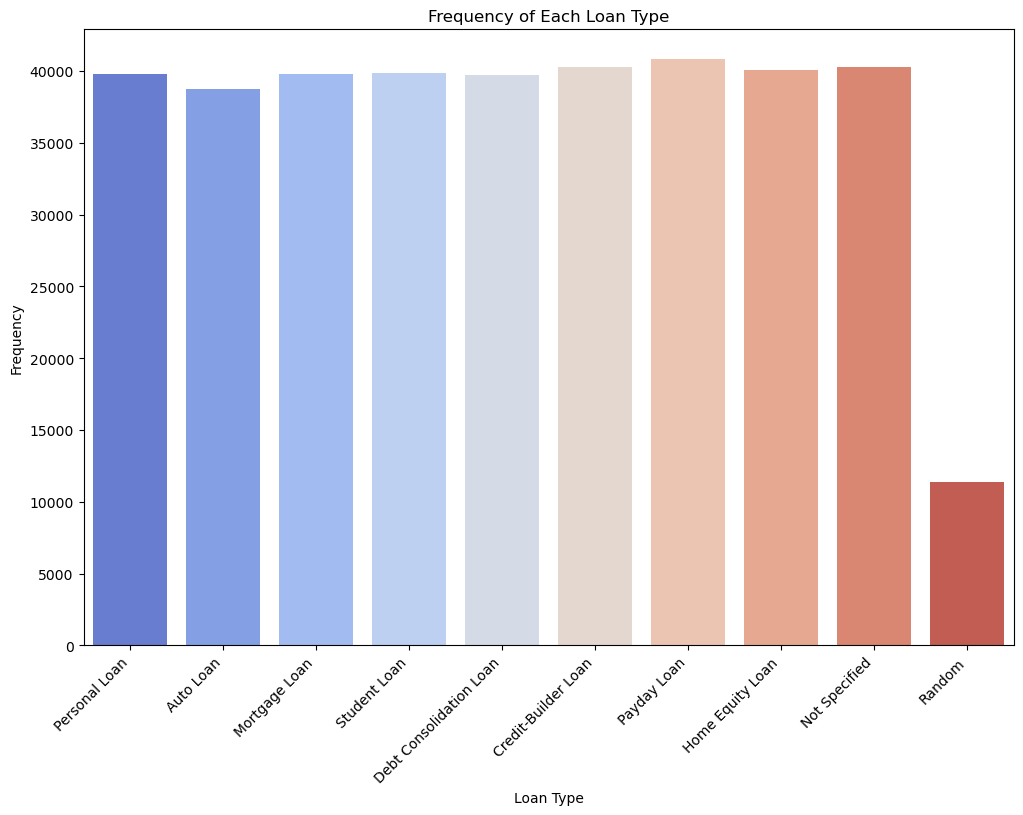

In [134]:
# Define the loan category mapping
loan_category_mapping = {
    'Personal Loan': ['Personal Loan', 'and Personal Loan'],
    'Auto Loan': ['Auto Loan', 'and Auto Loan'],
    'Mortgage Loan': ['Mortgage Loan', 'and Mortgage Loan'],
    'Student Loan': ['Student Loan', 'and Student Loan'],
    'Debt Consolidation Loan': ['Debt Consolidation Loan', 'and Debt Consolidation Loan'],
    'Credit-Builder Loan': ['Credit-Builder Loan', 'and Credit-Builder Loan'],
    'Payday Loan': ['Payday Loan', 'and Payday Loan'],
    'Home Equity Loan': ['Home Equity Loan', 'and Home Equity Loan'],
    'Not Specified': ['Not Specified', 'and Not Specified'],
    'Random':['Random']
}

# Flatten the mapping dictionary to count occurrences
loan_type_counts = {category: 0 for category in loan_category_mapping}

# Count occurrences
for category, subtypes in loan_category_mapping.items():
    for subtype in subtypes:
        loan_type_counts[category] += df['Type_of_Loan'].str.contains(subtype, case=False, na=False).sum()

# Convert counts to a DataFrame for plotting
loan_counts_df = pd.DataFrame(list(loan_type_counts.items()), columns=['Loan Type', 'Count'])

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Loan Type', y='Count', data=loan_counts_df, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Frequency of Each Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Frequency')
plt.show()

* The box plot shows the distribution of counts for each loan type, though it may not provide additional insights compared to a bar plot for categorical data.

#### 6) Heatmap of Correlations Between Numeric Variables

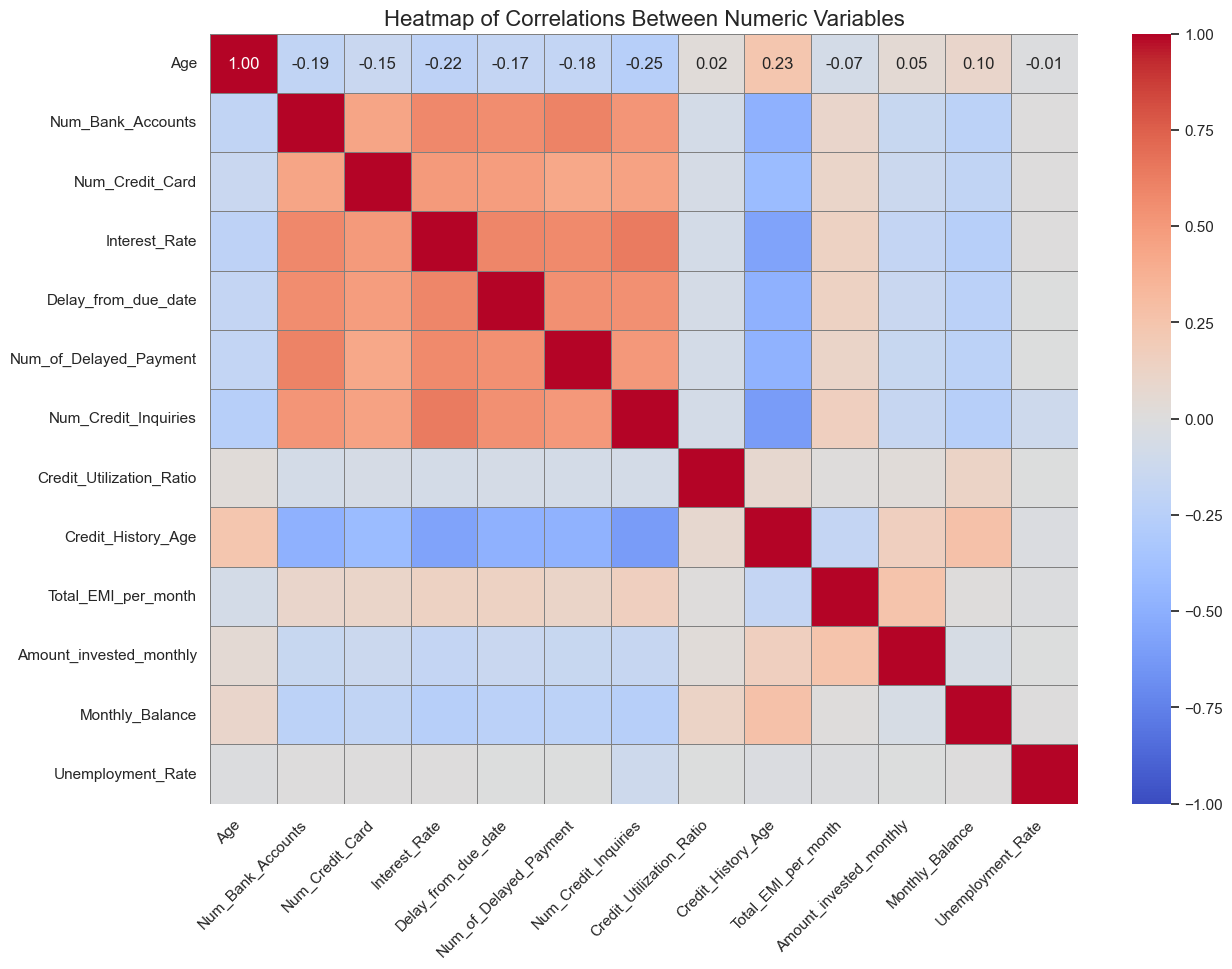

In [144]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='gray', vmin=-1, vmax=1)
plt.title('Heatmap of Correlations Between Numeric Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

#### 7) Violin plot of Credit History Age by Loan Category

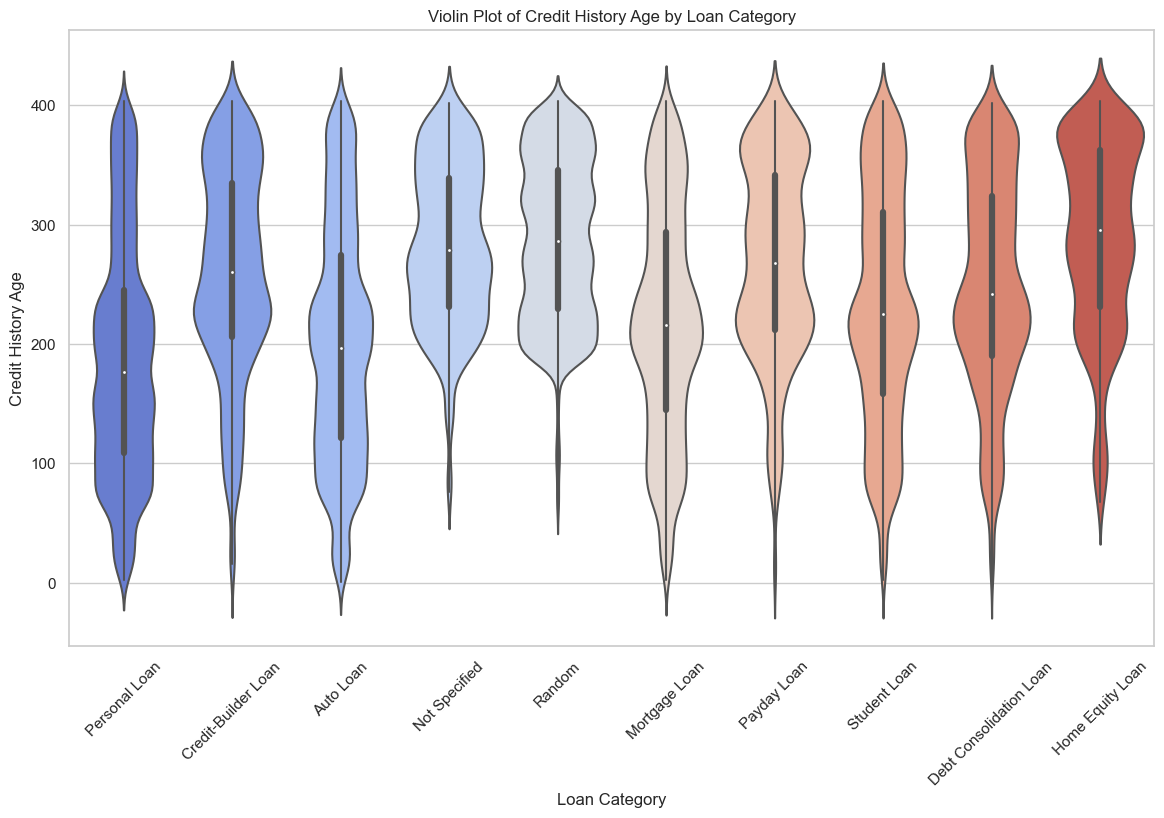

In [142]:
# Define the loan category mapping
loan_category_mapping = {
    'Personal Loan': ['Personal Loan', 'and Personal Loan'],
    'Auto Loan': ['Auto Loan', 'and Auto Loan'],
    'Mortgage Loan': ['Mortgage Loan', 'and Mortgage Loan'],
    'Student Loan': ['Student Loan', 'and Student Loan'],
    'Debt Consolidation Loan': ['Debt Consolidation Loan', 'and Debt Consolidation Loan'],
    'Credit-Builder Loan': ['Credit-Builder Loan', 'and Credit-Builder Loan'],
    'Payday Loan': ['Payday Loan', 'and Payday Loan'],
    'Home Equity Loan': ['Home Equity Loan', 'and Home Equity Loan'],
    'Not Specified': ['Not Specified', 'and Not Specified'],
    'Random': ['Random']
}

# Map loan types to broader categories
def map_loan_type(loan_type):
    for category, subtypes in loan_category_mapping.items():
        if any(subtype.lower() in loan_type.lower() for subtype in subtypes):
            return category
    return 'Unknown'

df['Loan_Category'] = df['Type_of_Loan'].apply(map_loan_type)

# Plot the distribution of Credit_History_Age by the new loan categories
plt.figure(figsize=(14, 8))
sns.violinplot(x='Loan_Category', y='Credit_History_Age', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Violin Plot of Credit History Age by Loan Category')
plt.xlabel('Loan Category')
plt.ylabel('Credit History Age')
plt.show()

#### 8) Boxplot of Interest rate by loan type

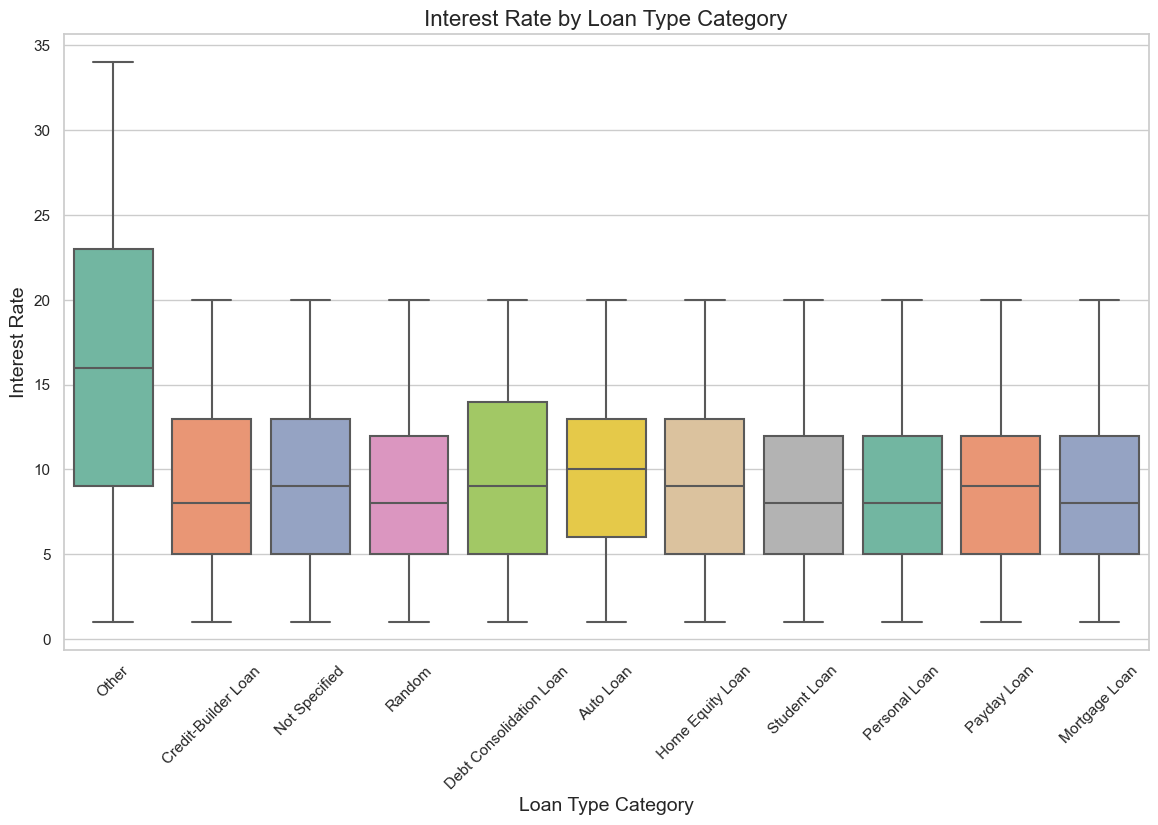

In [145]:
# Define the loan category mapping
loan_category_mapping = {
    'Personal Loan': ['Personal Loan', 'and Personal Loan'],
    'Auto Loan': ['Auto Loan', 'and Auto Loan'],
    'Mortgage Loan': ['Mortgage Loan', 'and Mortgage Loan'],
    'Student Loan': ['Student Loan', 'and Student Loan'],
    'Debt Consolidation Loan': ['Debt Consolidation Loan', 'and Debt Consolidation Loan'],
    'Credit-Builder Loan': ['Credit-Builder Loan', 'and Credit-Builder Loan'],
    'Payday Loan': ['Payday Loan', 'and Payday Loan'],
    'Home Equity Loan': ['Home Equity Loan', 'and Home Equity Loan'],
    'Not Specified': ['Not Specified', 'and Not Specified'],
    'Random': ['Random']
}

# Create a reverse mapping from loan type to broader categories
reverse_mapping = {item: category for category, items in loan_category_mapping.items() for item in items}

# Map the loan types in the DataFrame to broader categories
df['Loan_Category'] = df['Type_of_Loan'].map(reverse_mapping).fillna('Other')

# Create the plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Loan_Category', y='Interest_Rate', data=df, palette='Set2')
plt.title('Interest Rate by Loan Type Category', fontsize=16)
plt.xlabel('Loan Type Category', fontsize=14)
plt.ylabel('Interest Rate', fontsize=14)
plt.xticks(rotation=45)
plt.show()

#### 9) Barplot of Average Monthly Investment by Occupation and Credit Score

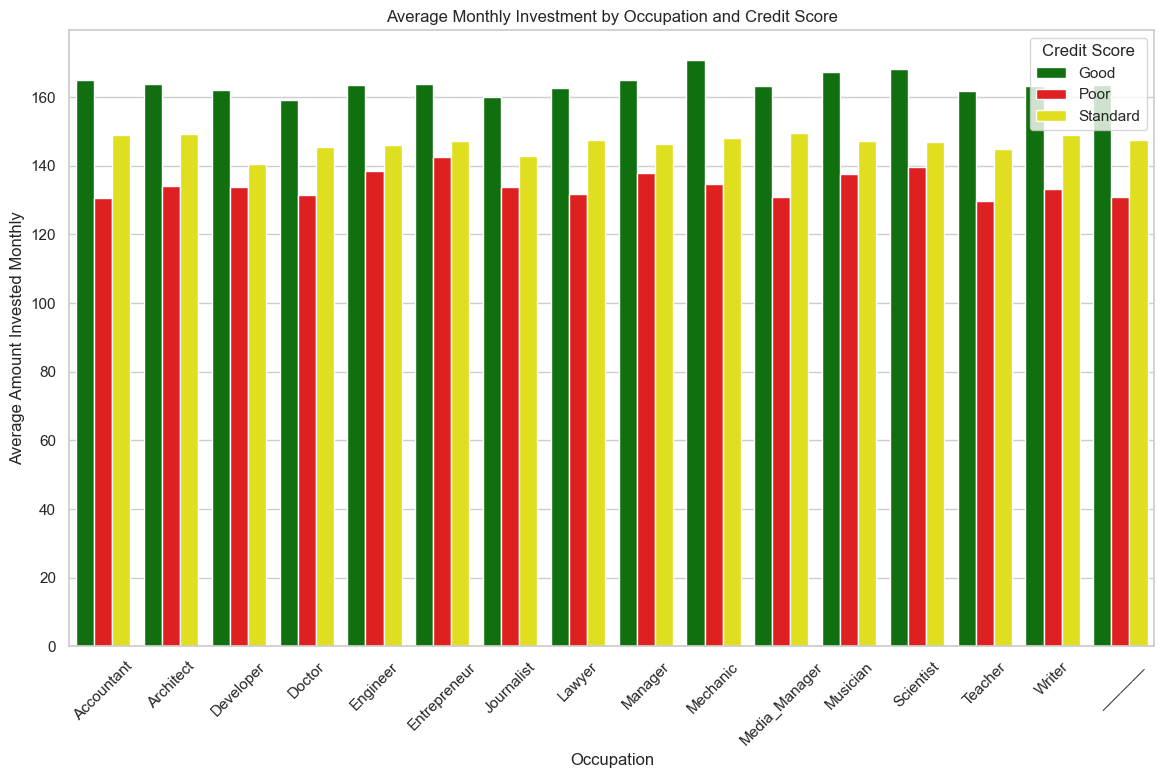

In [148]:
# Calculate the average Amount_invested_monthly by Occupation and Credit Score
occupation_credit_score_avg = df.groupby(['Occupation', 'Credit_Score'])['Amount_invested_monthly'].mean().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

colors = {'Good': 'green', 'Standard': 'yellow', 'Poor': 'red'}

# Create the bar plot
sns.barplot(data=occupation_credit_score_avg, x='Occupation', y='Amount_invested_monthly', hue='Credit_Score', palette=colors)

# Add titles and labels
plt.title('Average Monthly Investment by Occupation and Credit Score')
plt.xlabel('Occupation')
plt.ylabel('Average Amount Invested Monthly')
plt.xticks(rotation=45)
plt.legend(title='Credit Score')
plt.show()

In [ ]:
#### 10) 